# Project: TMDB MOVIE DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>I will be cleaning and analyzing this data to answer the following questions:
<ol>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>what is the correlation between runtime and revenue</li>
<li>what is the correlation between runtime and popularity</li>
<li>Which genre creates the most revenue</li>
<li>Top ten movies by revenue</li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### Loading the movie data

In [3]:
df = pd.read_csv("tmdb-movies.csv")
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Viewing our data's general properties

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.shape

(10866, 21)

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 
> Dropping some extreaneous columns that will not be of use in the analysis process

In [9]:
#dropping some columns and viewing the data
drop_col = ['homepage', 'id', 'imdb_id', 'tagline', 'overview', 'cast', 'release_date']
df.drop(columns=drop_col, axis=1, inplace=True)
df.head(1)


,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [10]:
df.shape

(10866, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   keywords              9373 non-null   object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


### Working with missing data.
> From the above result, we can see that the columns; director, runtime, keywords, genres, and production companies have missing values. First, i will examine them to decide if i want to drop the related null rows or not.

In [12]:
#check the sum of null values in production company column
df['production_companies'].isna().value_counts()

False    9836
True     1030
Name: production_companies, dtype: int64

In [13]:
#check the details of the dataframe where production company column is nul
df[df.production_companies.isnull()]

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,0,0,Racing Extinction,Louie Psihoyos,animal species|earth|scientist|globe|activist,90,Adventure|Documentary,NaN,36,7.8,2015,0.0,0.0
259,0.476341,0,0,Crown for Christmas,Alex Zamm,NaN,84,TV Movie,NaN,10,7.6,2015,0.0,0.0
295,0.417191,0,0,12 Gifts of Christmas,Peter Sullivan,christmas,84,Family|TV Movie,NaN,12,6.3,2015,0.0,0.0
298,0.370258,0,0,The Girl in the Photographs,Nick Simon,serial killer|tied feet|tied up while barefoot,95,Crime|Horror|Thriller,NaN,10,4.7,2015,0.0,0.0
328,0.367617,0,0,Advantageous,Jennifer Phang,identity|unemployment|dystopic future|woman di...,92,Science Fiction|Drama|Family,NaN,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,0.149259,0,0,Interiors,Woody Allen,independent film,93,Drama,NaN,35,6.3,1978,0.0,0.0
10806,0.138635,0,0,Gates of Heaven,Errol Morris,pet|pet cemetery|napa valley,85,Documentary,NaN,12,5.9,1978,0.0,0.0
10816,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,musical|mockumentary,76,Comedy,NaN,14,6.0,1978,0.0,0.0
10842,0.253437,0,0,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,NaN,25,Animation|Family,NaN,12,7.9,1966,0.0,0.0


> Everywhere production_company is null, we noticed that  revenue and budget == 0 and so, dropping the associated rows seems logical


In [14]:
#drop all rows where production_companies column is null
df.dropna(subset=['production_companies'], inplace = True)

In [15]:
#confirm 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9836 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9836 non-null   float64
 1   budget                9836 non-null   int64  
 2   revenue               9836 non-null   int64  
 3   original_title        9836 non-null   object 
 4   director              9815 non-null   object 
 5   keywords              8706 non-null   object 
 6   runtime               9836 non-null   int64  
 7   genres                9827 non-null   object 
 8   production_companies  9836 non-null   object 
 9   vote_count            9836 non-null   int64  
 10  vote_average          9836 non-null   float64
 11  release_year          9836 non-null   int64  
 12  budget_adj            9836 non-null   float64
 13  revenue_adj           9836 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


>Investigating the director null values

In [16]:
#get all details where director column is null
df[df['director'].isnull()]

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,NaN,stand-up|stand up comedy|aftercreditsstinger|d...,71,Comedy,New Wave Entertainment,14,6.6,2015,0.000000e+00,0.000000e+00
548,0.108072,0,0,Sense8: Creating the World,NaN,sexuality|superhuman|superpower|making of|soci...,25,Documentary|Science Fiction,Netflix,12,7.5,2015,0.000000e+00,0.000000e+00
556,0.100910,0,0,With This Ring,NaN,wedding,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,14,6.5,2015,0.000000e+00,0.000000e+00
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,NaN,superhero|marvel cinematic universe,43,TV Movie|Documentary,Marvel Studios|ABC Studios,32,6.3,2014,0.000000e+00,0.000000e+00
1203,0.119891,150000,0,Free to Play,NaN,competition|video game|esports|dota 2,75,Documentary,Valve,40,7.0,2014,1.381637e+05,0.000000e+00
1288,0.038364,0,0,Top Gear: The Perfect Road Trip 2,NaN,NaN,94,Documentary,2 Entertain Video,12,6.8,2014,0.000000e+00,0.000000e+00
1852,0.256703,0,0,The Diary of Anne Frank,NaN,diary|anne frank|jewish|girl|nazi occupation,100,Drama,Darlow Smithson Productions|British Broadcasti...,19,7.5,2009,0.000000e+00,0.000000e+00
1872,0.091395,3250000,0,Paa,NaN,NaN,133,Drama|Family|Foreign,A B Corp,11,6.1,2009,3.303301e+06,0.000000e+00
1895,0.056777,0,0,Doctor Who: The Waters of Mars,NaN,NaN,62,Science Fiction|Adventure|Family,BBC Wales,25,8.0,2009,0.000000e+00,0.000000e+00
2221,0.281852,0,0,Scott Pilgrim vs. the Animation,NaN,NaN,4,TV Movie|Animation|Adventure,Titmouse,19,7.7,2010,0.000000e+00,0.000000e+00


> Everywheredirector is null, we noticed that most of the revenue and budget columns == 0 and so, dropping the associated rows seems logical


In [17]:
# dropping the rows where director is null and confirming my change
df.dropna(subset=['director'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9815 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9815 non-null   float64
 1   budget                9815 non-null   int64  
 2   revenue               9815 non-null   int64  
 3   original_title        9815 non-null   object 
 4   director              9815 non-null   object 
 5   keywords              8696 non-null   object 
 6   runtime               9815 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9815 non-null   object 
 9   vote_count            9815 non-null   int64  
 10  vote_average          9815 non-null   float64
 11  release_year          9815 non-null   int64  
 12  budget_adj            9815 non-null   float64
 13  revenue_adj           9815 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


>For the genre column, we will need to split the separated words therefore, i will be dropping the associated rows where genres is null

In [18]:
#dropping rows that have null genres
df.dropna(subset=['genres'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   int64  
 2   revenue               9807 non-null   int64  
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   keywords              8692 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   vote_count            9807 non-null   int64  
 10  vote_average          9807 non-null   float64
 11  release_year          9807 non-null   int64  
 12  budget_adj            9807 non-null   float64
 13  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


#### Spliting the genre column
> I tried several methods but here is what i decided to go with.
> I replaced the space with nothing then changed the (|) sign to a (,) sign so that i could split it

In [19]:
#Replaced the space with nothing, then replace | with ,
df['genres'] = df['genres'].str.replace(' ', '')
df['genres'] = df['genres'].str.replace('|', ',')


C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\2025584836.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|', ',')


In [20]:
# I created a subset of the main df and then saved to file so that i can split the genre column and continue to analyse
#note i am to append to the main dataframe later
hb_genre = df[df['genres'].str.contains(',')]
hb_genre.to_csv('TMDB_SPLIT.csv', index=False)

In [21]:
#Bringing in the data that contains commas and viewing it
df1 = pd.read_csv('TMDB_SPLIT.csv')
df1.shape

(7833, 14)

> get the number/count of words/genres after every (,) in the dataframe. this is to help with the spliiting process. 
Why i did this was because i noticed that some values in the genre column contain 2, 3, 4 or more words in them. 

>So i first got the count of the words before and after every comma then created a new column with the count. 
After that i get where the count is equal to a particular value and then split it into the number and append the data frames.

In [22]:
#get the number/count of words/genres after every (,) in the dataframe. this is to help with the spliiting process
num = []
for i in range(len(df1)):
   num.append(len(df1['genres'].apply(lambda x: x.split(","))[i][:]))
    
num

[4,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 5,
 2,
 3,
 2,
 2,
 4,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 5,
 5,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 5,
 3,
 3,
 5,
 2,
 2,
 2,
 3,
 3,
 2,
 5,
 5,
 3,
 2,
 3,
 4,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 2,
 4,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 4,
 3,
 4,
 2,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 5,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 4,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 4,
 3,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 2,
 3,
 3,
 4,
 2,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 5,
 3,
 2,
 2,
 3,
 4,
 2,
 3,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 5,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 3,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 3,
 2,
 3,
 4,
 4,
 3,
 2,
 2,
 2,
 4,
 2,
 3,
 4,
 4,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,


In [23]:
#create a new column 'genre_count' and insert the word count of genres in it
df1['genre_count'] = num
    

In [24]:
#verify
df1.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"Action,Adventure,ScienceFiction,Thriller",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,4
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"Action,Adventure,ScienceFiction,Thriller",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,4
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"Adventure,ScienceFiction,Thriller",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,"Action,Adventure,ScienceFiction,Fantasy",Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,4
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,"Action,Crime,Thriller",Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,3


In [25]:
#get the unique values in the genre_count column
df1['genre_count'].value_counts()

2    3115
3    2867
4    1343
5     508
Name: genre_count, dtype: int64

In [26]:
#create a new dataframe where the valuecount is = 5
df5 = df1.query('genre_count == 5')
df5.shape

(508, 15)

In [27]:
#since the highest count of hybrid values in the genre colum is 5, make 5 copies of the hybrid dataframe
df_01 = df5.copy()
df_02 = df5.copy()
df_03 = df5.copy()
df_04 = df5.copy()
df_05 = df5.copy()

In [28]:
#Apply the split function to the genre column
df_01['genres'] = df_01['genres'].apply(lambda x: x.split(",")[0])
df_02['genres'] = df_02['genres'].apply(lambda x: x.split(",")[1])
df_03['genres'] = df_03['genres'].apply(lambda x: x.split(",")[2])
df_04['genres'] = df_04['genres'].apply(lambda x: x.split(",")[3])
df_05['genres'] = df_05['genres'].apply(lambda x: x.split(",")[4])

In [29]:
#verify
df_01.shape, df_02.shape, df_03.shape, df_04.shape, df_05.shape

((508, 15), (508, 15), (508, 15), (508, 15), (508, 15))

In [30]:
#append all dataframes to a df called df_05_main
df_05_main = df_01.append([df_02, df_03, df_04, df_05])
df_05_main.shape

C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\706765311.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_05_main = df_01.append([df_02, df_03, df_04, df_05])


(2540, 15)

In [31]:
#creating a function to split the genre columns where the count = 4,3 and 2 into dataframes and appending them 
#based on what we did above for count = 5
def split_genre(n):
    global df_04_main
    global df_03_main
    global df_02_main
    if n == 4:
        df4 = df1.query('genre_count == 4')
        df_01 = df4.copy()
        df_02 = df4.copy()
        df_03 = df4.copy()
        df_04 = df4.copy()
        df_01['genres'] = df_01['genres'].apply(lambda x: x.split(",")[0])
        df_02['genres'] = df_02['genres'].apply(lambda x: x.split(",")[1])
        df_03['genres'] = df_03['genres'].apply(lambda x: x.split(",")[2])
        df_04['genres'] = df_04['genres'].apply(lambda x: x.split(",")[3])
        df_04_main = df_01.append([df_02, df_03, df_04])
        return df_04_main.head()
    elif n == 3:
        df3= df1.query('genre_count == 3')
        df_01 = df3.copy()
        df_02 = df3.copy()
        df_03 = df3.copy()
        df_01['genres'] = df_01['genres'].apply(lambda x: x.split(",")[0])
        df_02['genres'] = df_02['genres'].apply(lambda x: x.split(",")[1])
        df_03['genres'] = df_03['genres'].apply(lambda x: x.split(",")[2])
        df_03_main = df_01.append([df_02, df_03])
        return df_03_main.shape
    elif n == 2:
        df2= df1.query('genre_count == 2')
        df_01 = df2.copy()
        df_02 = df2.copy()
        
        df_01['genres'] = df_01['genres'].apply(lambda x: x.split(",")[0])
        df_02['genres'] = df_02['genres'].apply(lambda x: x.split(",")[1])
        
        df_02_main = df_01.append([df_02])
        return df_02_main.shape
    else:
        return False
    


In [32]:
#Calling the function
split_genre(4)
split_genre(3)
split_genre(2)

C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\2715807415.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_04_main = df_01.append([df_02, df_03, df_04])
C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\2715807415.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_03_main = df_01.append([df_02, df_03])
C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\2715807415.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_02_main = df_01.append([df_02])


(6230, 15)

>VErifying all splitted dataframes

In [33]:
df_05_main.head(1)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count
20,5.462138,190000000,209035668,Tomorrowland,Brad Bird,inventor|apocalypse|destiny|imax|dreamer,130,Action,Walt Disney Pictures|Babieka|A113,1899,6.2,2015,1.747999e+08,1.923127e+08,5


In [34]:
df_04_main.head(1)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,4


In [35]:
df_03_main.head(1)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3


In [36]:
df_02_main.head(1)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count
12,6.118847,15000000,36869414,Ex Machina,Alex Garland,dancing|artificial intelligence|helicopter|dis...,108,Drama,DNA Films|Universal Pictures International (UP...,2854,7.6,2015,1.379999e+07,3.391985e+07,2


In [37]:
#Appending the splited dataframe
df_main = df_05_main.append([df_04_main, df_03_main, df_02_main])
df_main.shape

C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\3577324255.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main = df_05_main.append([df_04_main, df_03_main, df_02_main])


(22743, 15)

>Now that we have splited the genre column, appended the splitted rows and saved them in a new dataframe, we need to delete the previous instance from our main dataframe and  then append with the new information

In [38]:
#Viewing the previous dataframe
df_main.head(1)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count
20,5.462138,190000000,209035668,Tomorrowland,Brad Bird,inventor|apocalypse|destiny|imax|dreamer,130,Action,Walt Disney Pictures|Babieka|A113,1899,6.2,2015,1.747999e+08,1.923127e+08,5


In [39]:
df.shape

(9807, 14)

In [40]:
hb_genre.shape

(7833, 14)

In [41]:
#dropping the rows in the main dataframe that have the same index as the data we splitted
#(i.e the data that has "|" in the genre column)
df.drop(hb_genre.index, inplace=True)

In [42]:
df.shape

(1974, 14)

In [43]:
#appending our main dataframe to our splitted dataframe
df_main = df_main.append(df, ignore_index=True)
df_main.shape

C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\3420346012.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main = df_main.append(df, ignore_index=True)


(24717, 15)

In [44]:
#dropping the genre_count column since it is irrelevant to our analysis
drop_col = ['genre_count']
df_main.drop(columns=drop_col, axis=1, inplace=True)
df_main.head(1)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,5.462138,190000000,209035668,Tomorrowland,Brad Bird,inventor|apocalypse|destiny|imax|dreamer,130,Action,Walt Disney Pictures|Babieka|A113,1899,6.2,2015,1.747999e+08,1.923127e+08


In [45]:
#checking the unique values in the genre column
df_main['genres'].value_counts()

Drama             4370
Comedy            3438
Thriller          2748
Action            2236
Romance           1570
Horror            1526
Adventure         1385
Crime             1300
ScienceFiction    1138
Family            1103
Fantasy            842
Mystery            773
Animation          637
Music              341
Documentary        331
History            308
War                259
Western            160
TVMovie            132
Foreign            120
Name: genres, dtype: int64

>Now that we are done with Missing rows and splitted the genre column, lets check for duplicate data

In [46]:
#Getting the sum of the duplicate rows
df_main.duplicated().value_counts()

False    24712
True         5
dtype: int64

In [47]:
#get the deplicated row
df_main[df_main.duplicated()]

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
70,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0
578,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Drama,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0
1086,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Action,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0
1594,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Thriller,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0
2102,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,ScienceFiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0


In [48]:
#dropping duplicates
df_main.drop_duplicates(inplace = True)

In [49]:
#Getting the sum of the duplicate rows
df_main.duplicated().value_counts()

False    24712
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1: Which genres are most popular from year to year?

In [50]:
#Getting the mean popularity grouping by genres and release year
gen_pop = df_main.groupby([ 'genres', 'release_year',])['popularity'].mean()
gen_pop

genres   release_year
Action   1960            0.590724
         1961            0.365913
         1962            0.845972
         1963            0.951729
         1964            0.813087
                           ...   
Western  2011            1.175800
         2012            2.242083
         2013            0.665255
         2014            0.775435
         2015            3.178796
Name: popularity, Length: 1044, dtype: float64

In [51]:
#Seeing that the release year are quite much, i decided to put them in a list so that i can iterate through them for my visualization
release_year = set(df_main['release_year'].values)
release_year = list(release_year)
release_year

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

C:\Users\Kwristie\AppData\Local\Temp\ipykernel_7776\4200276522.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,10))


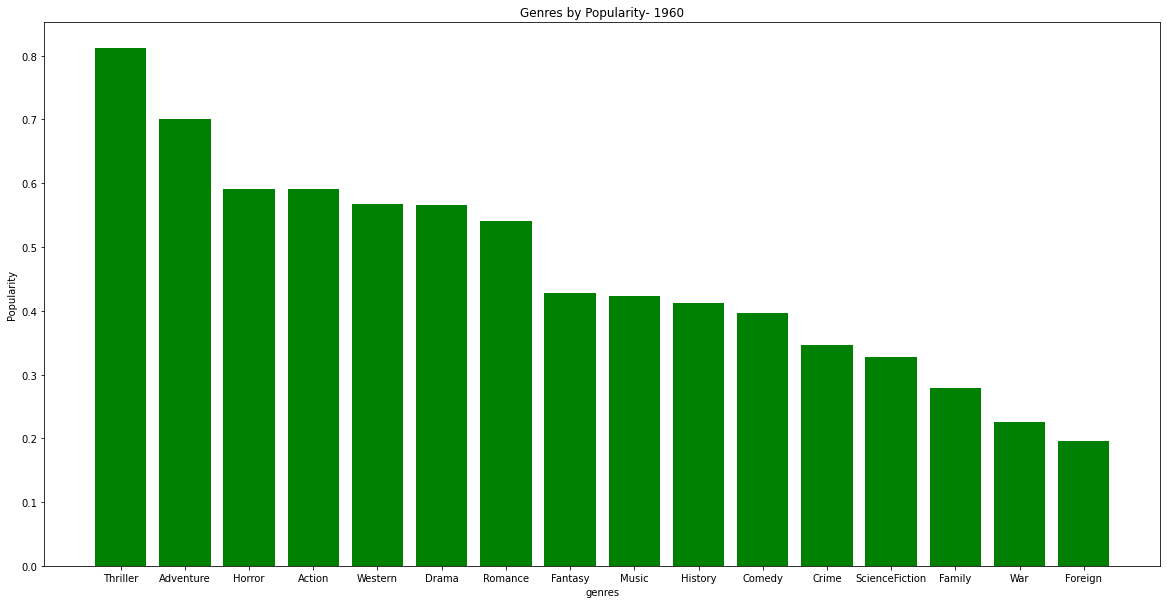

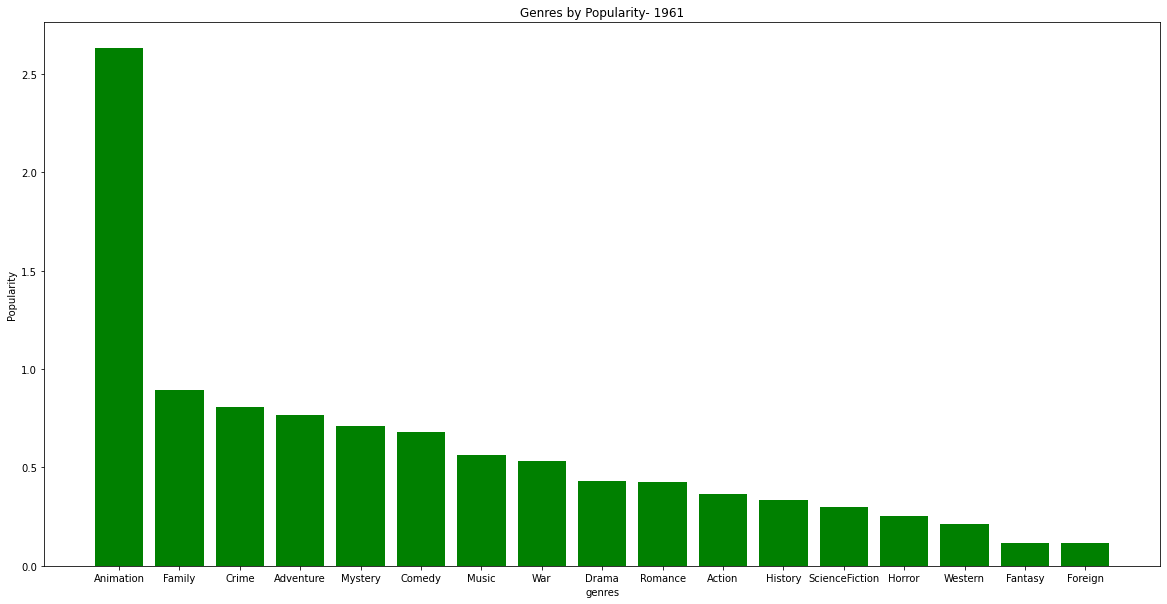

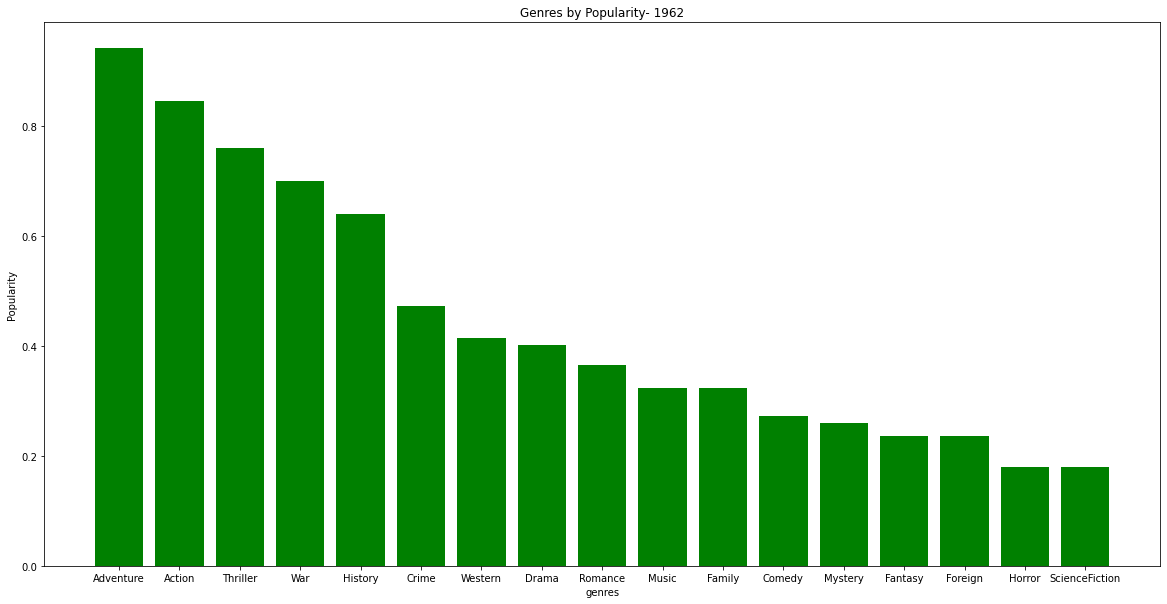

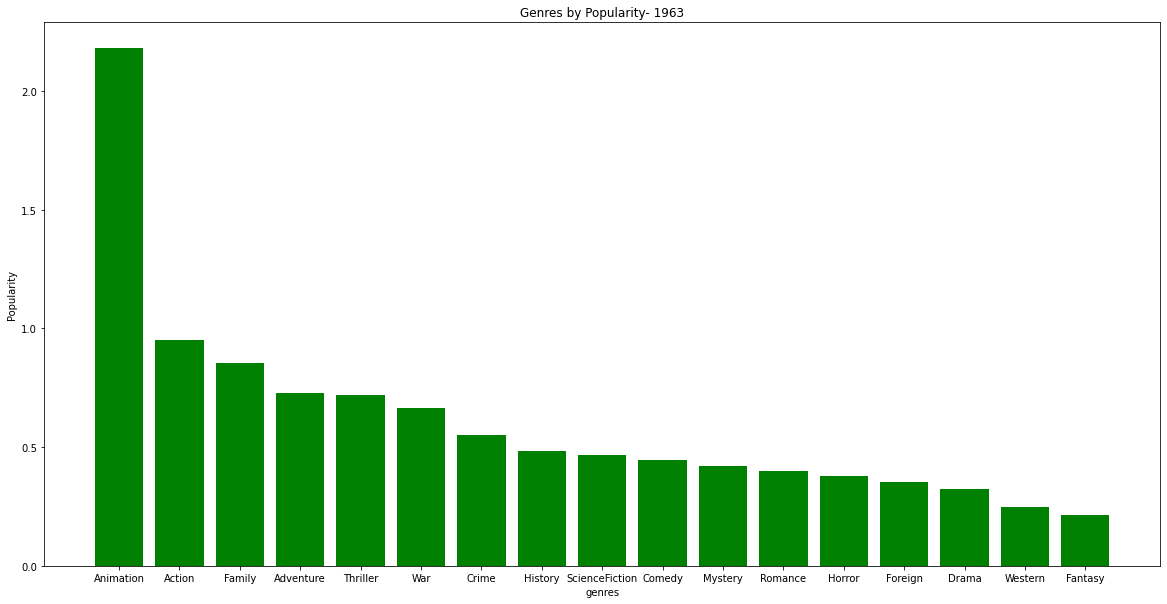

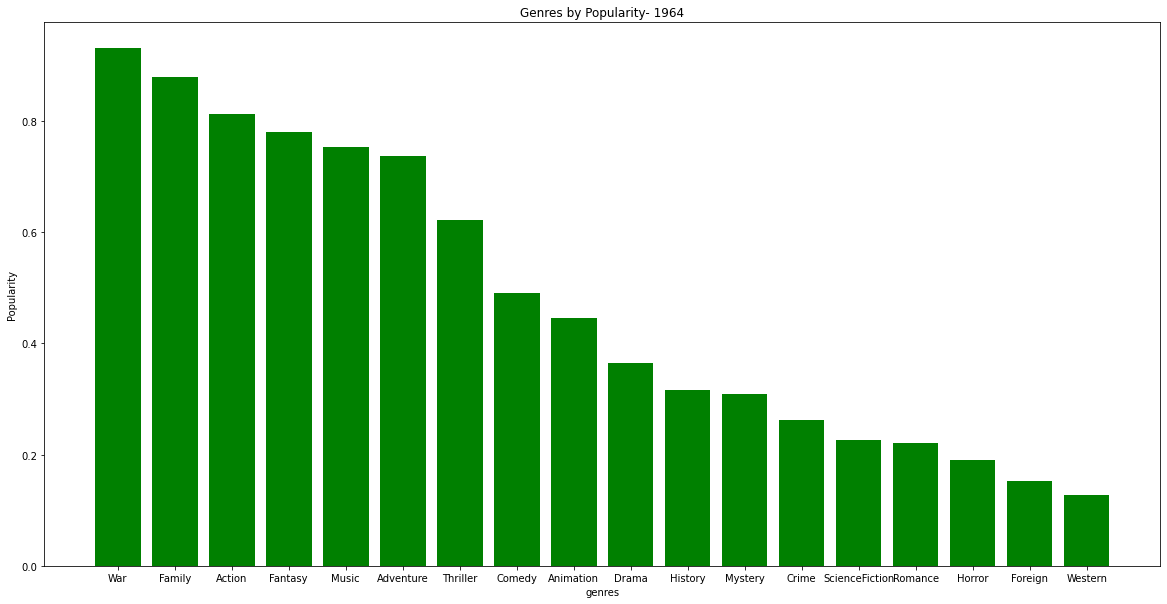

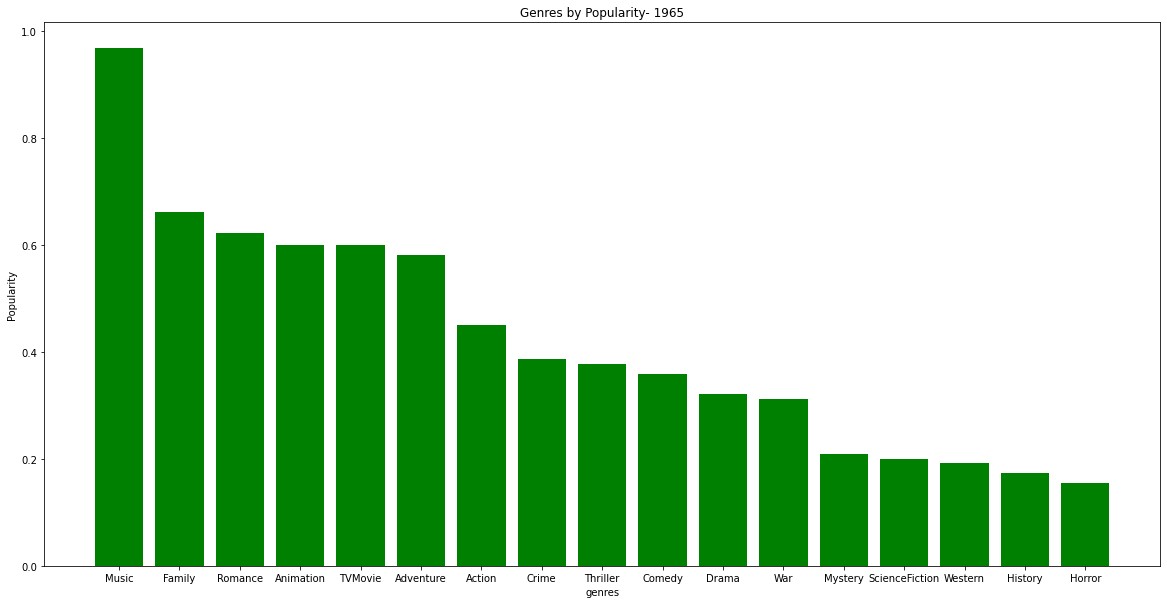

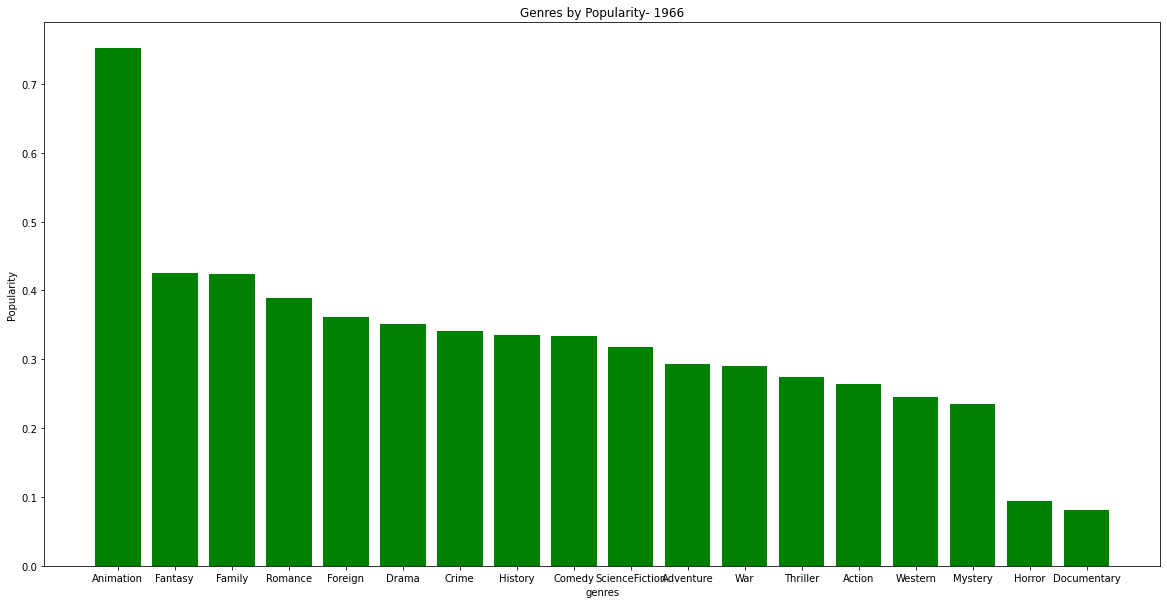

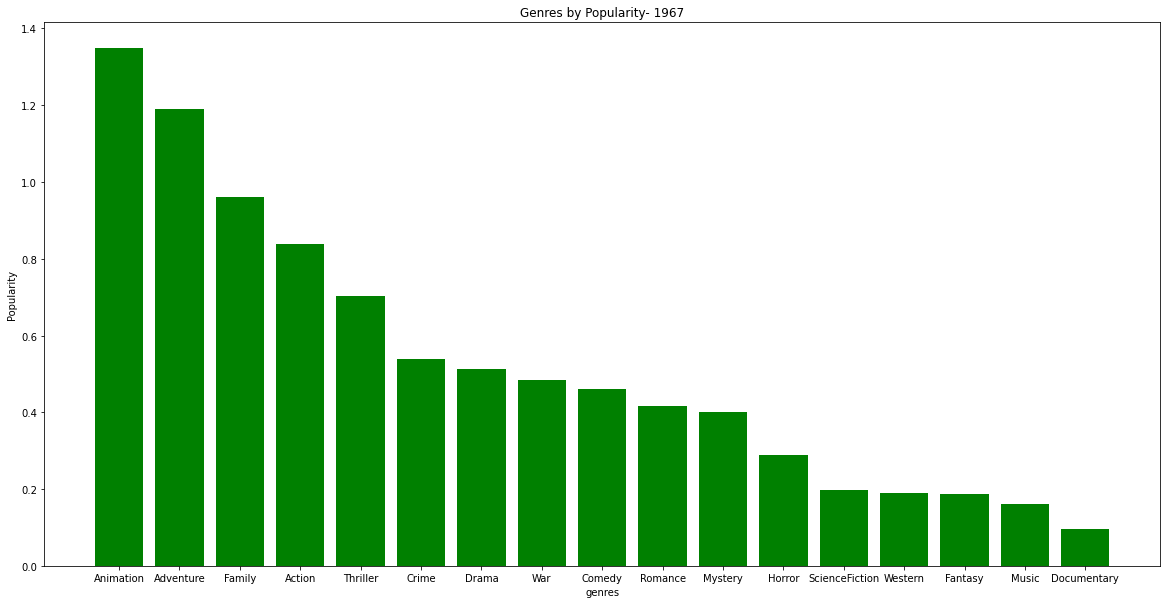

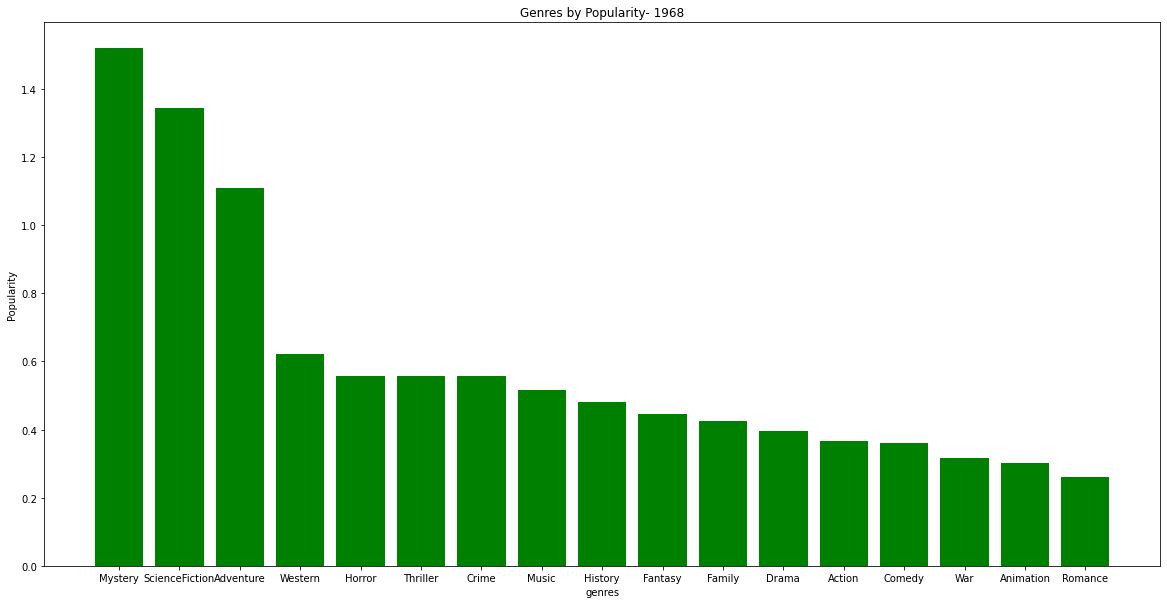

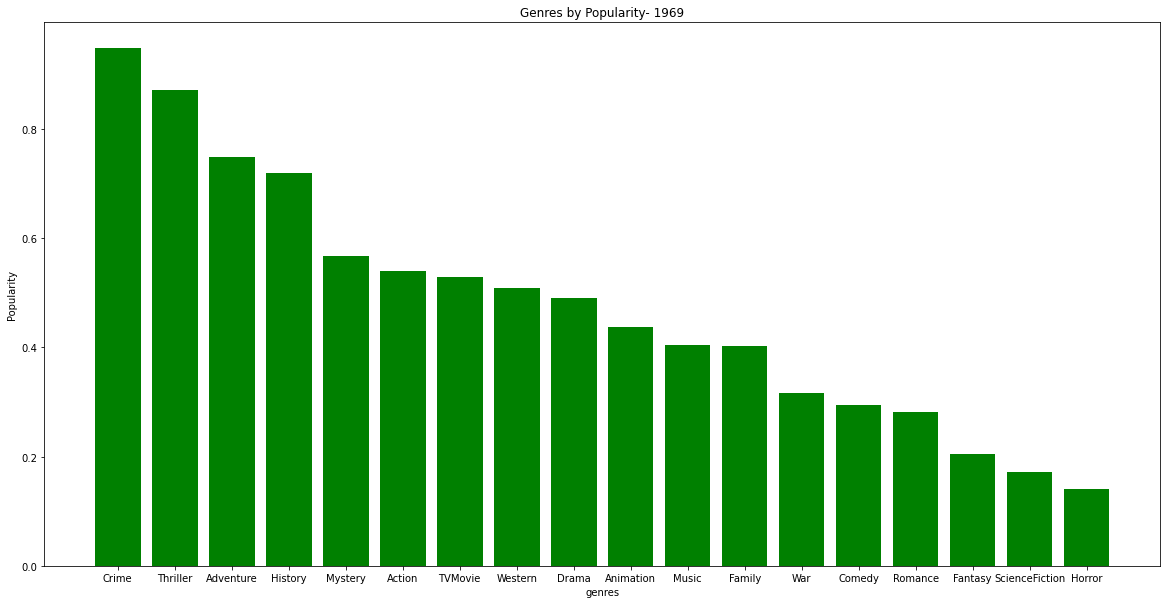

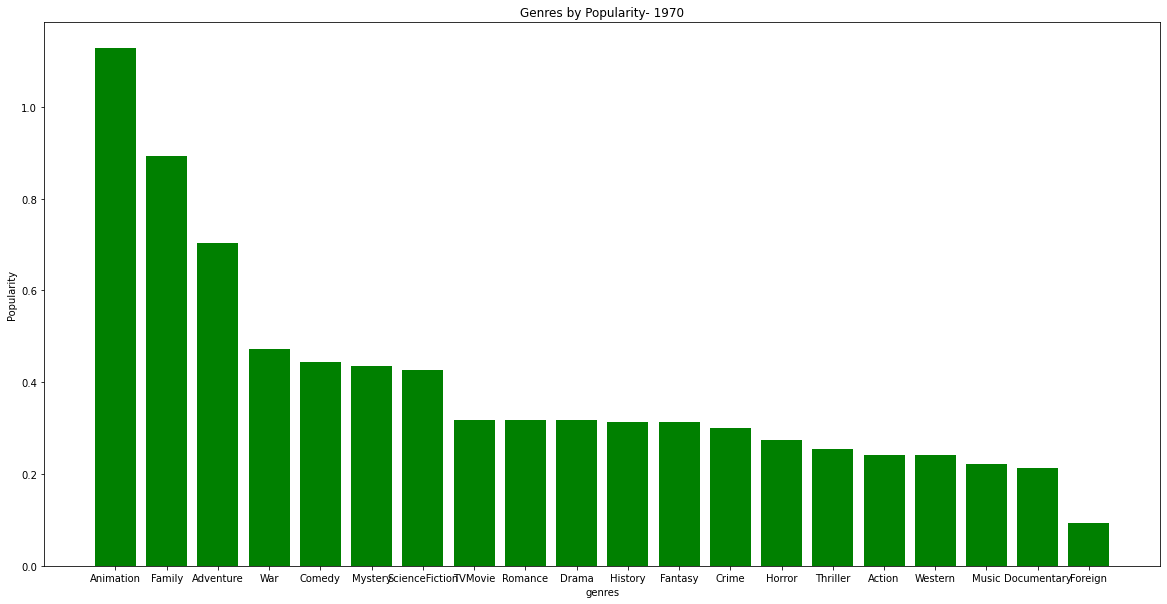

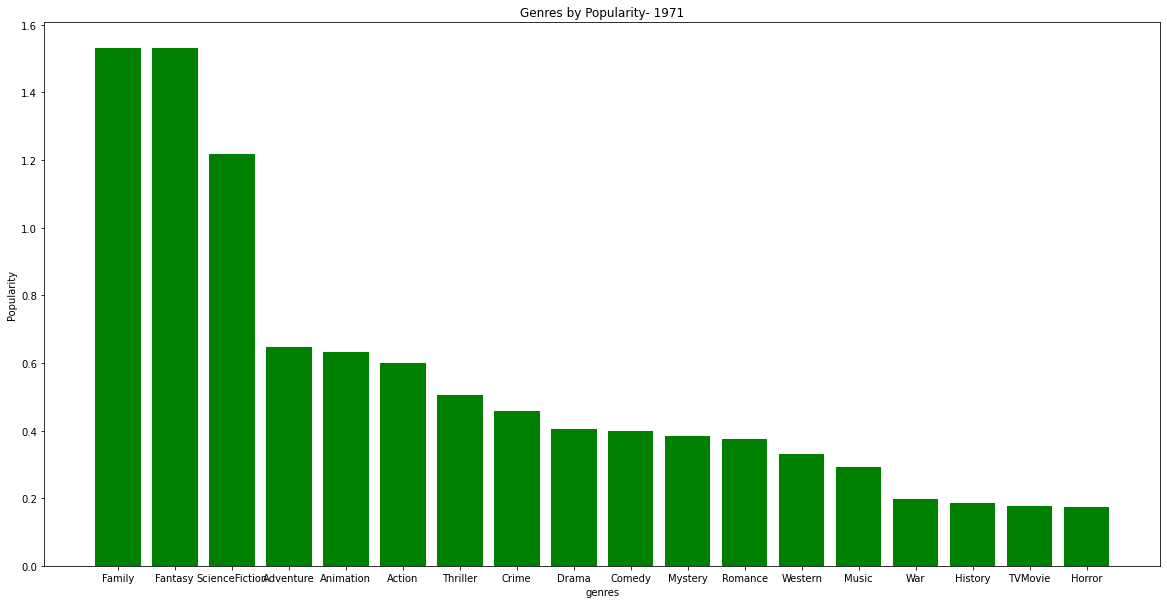

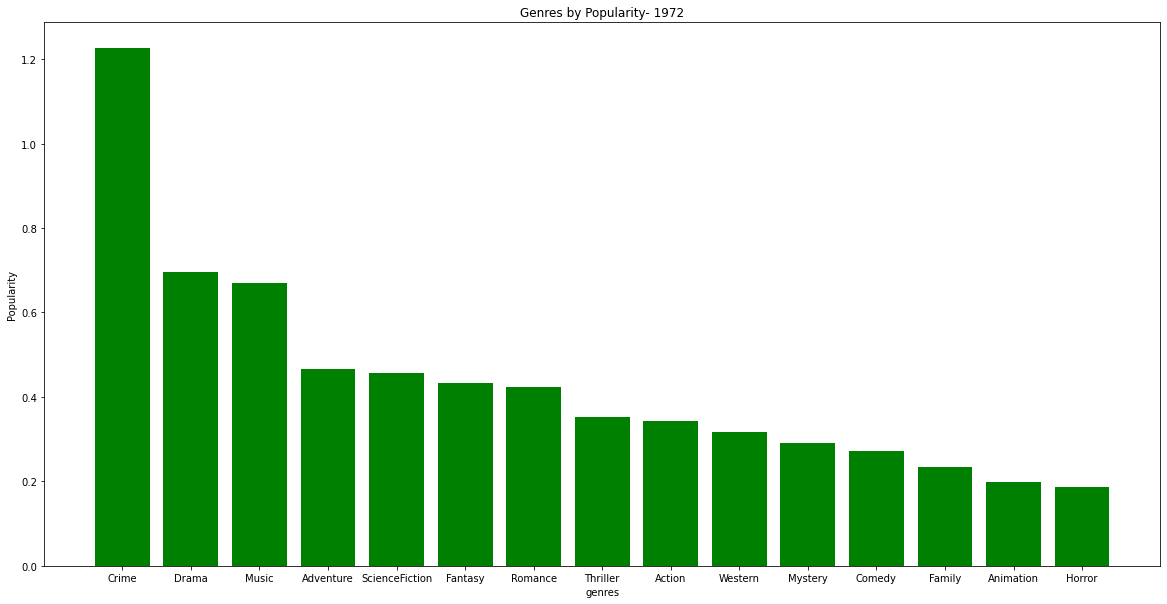

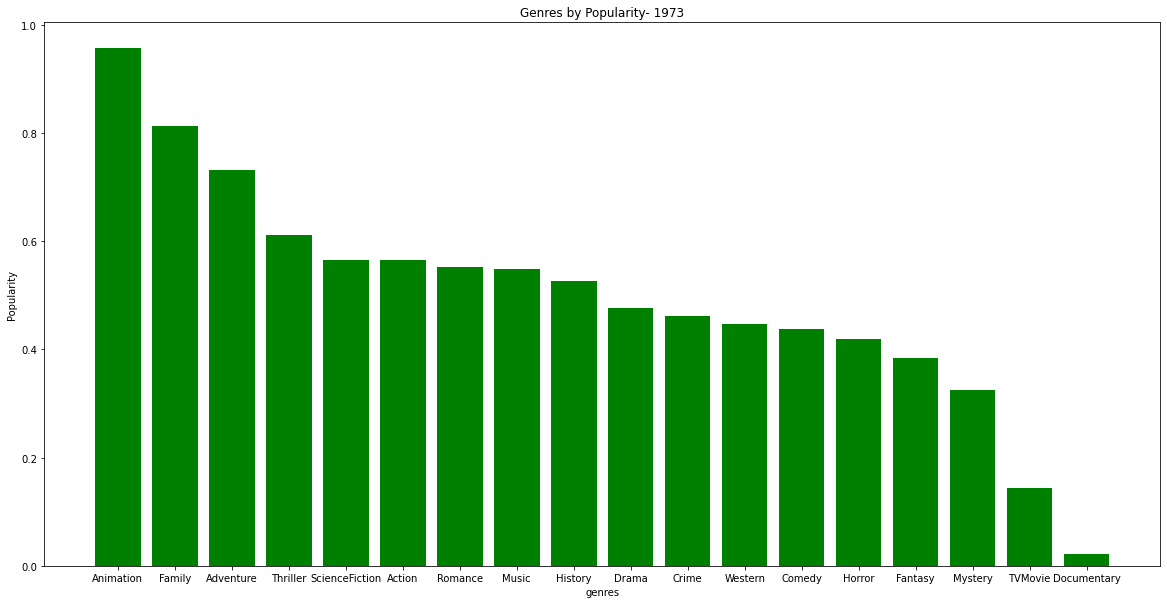

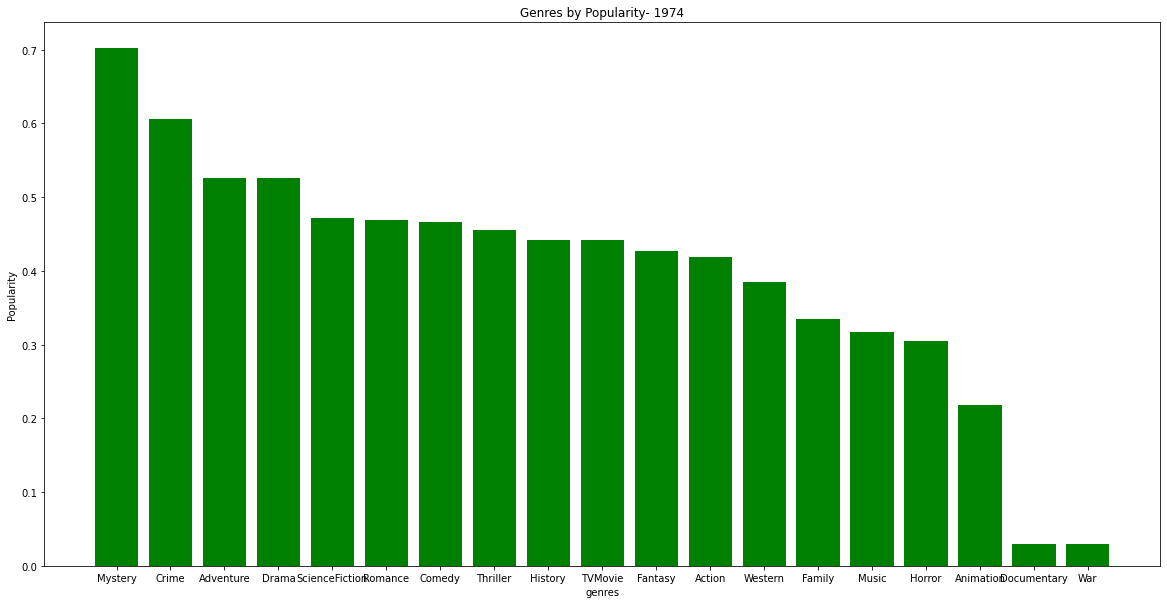

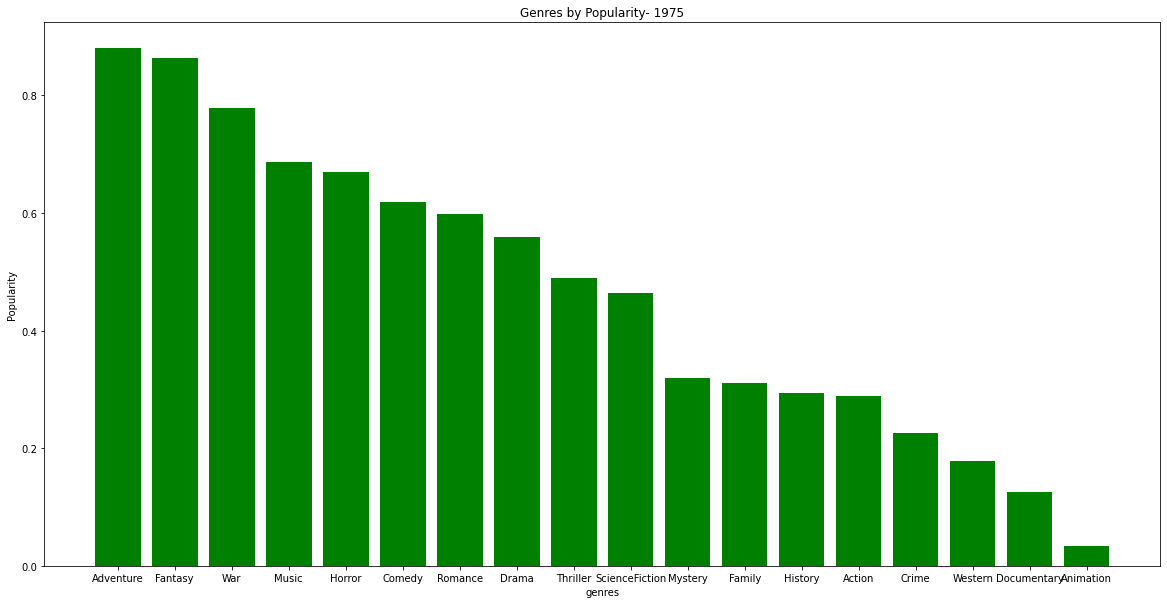

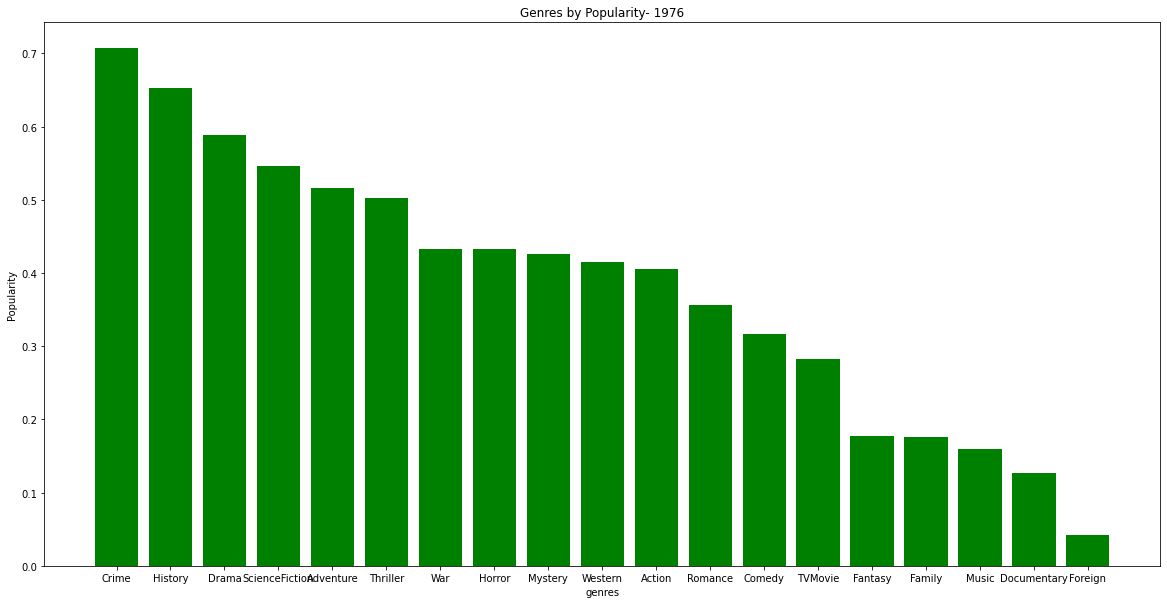

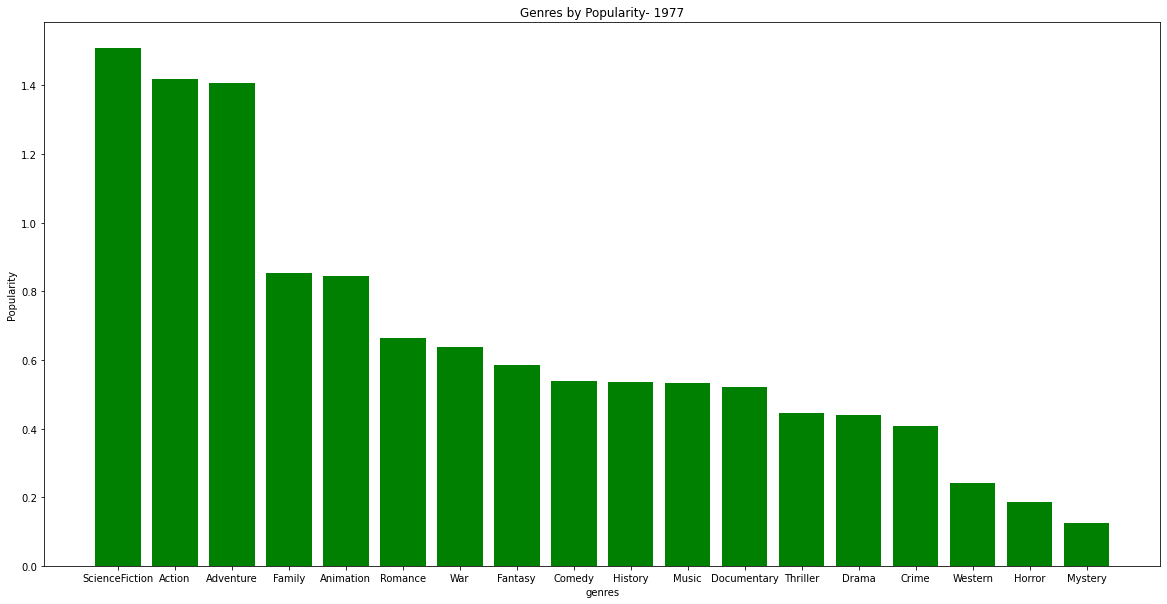

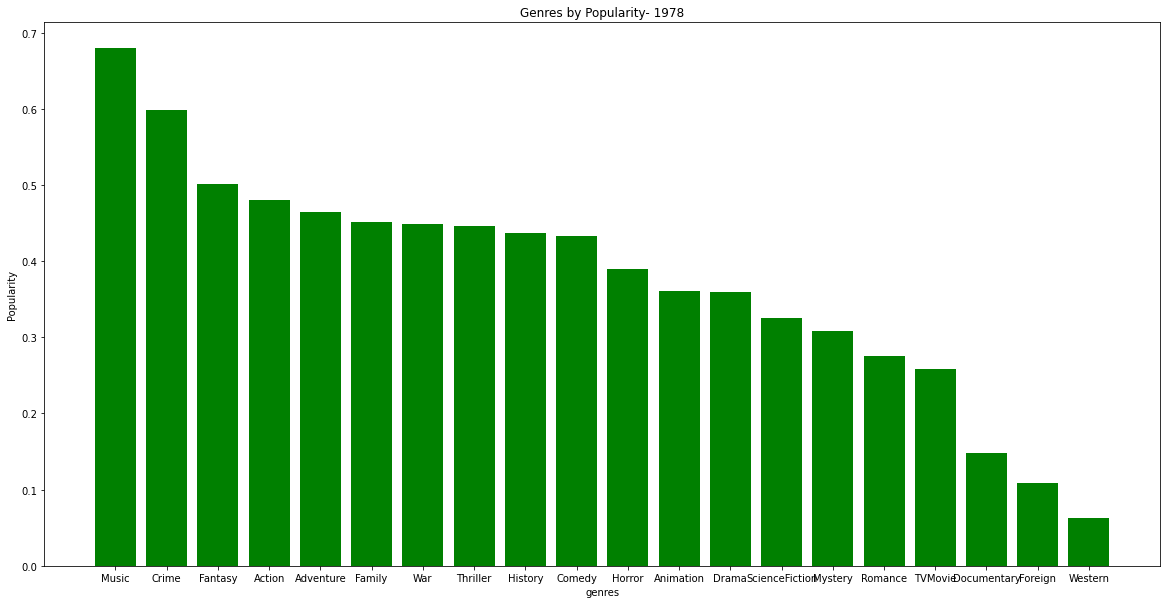

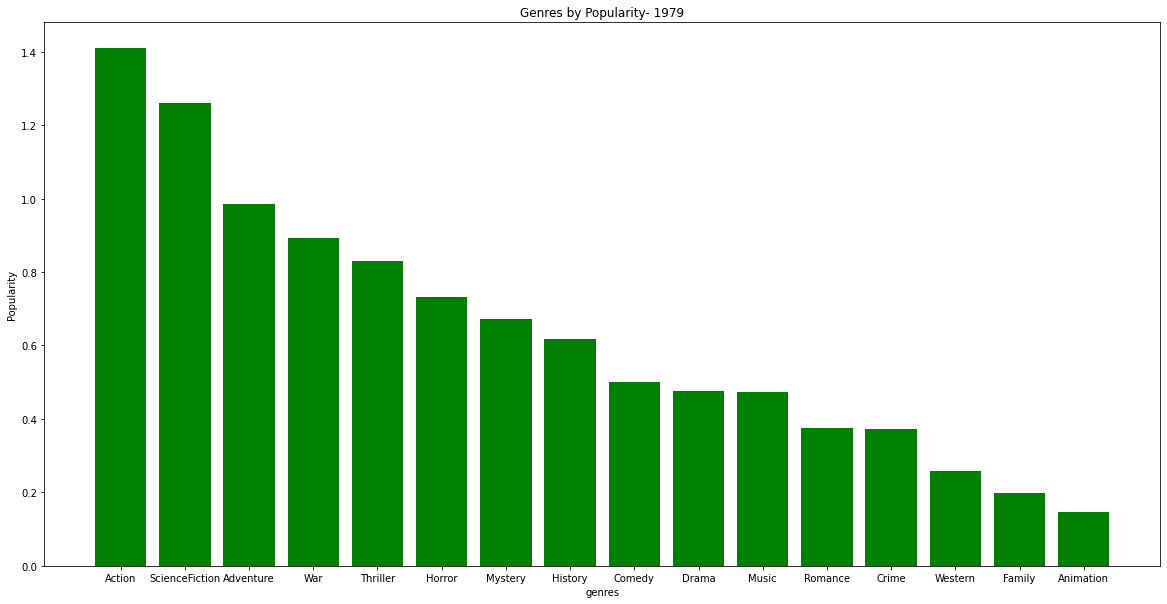

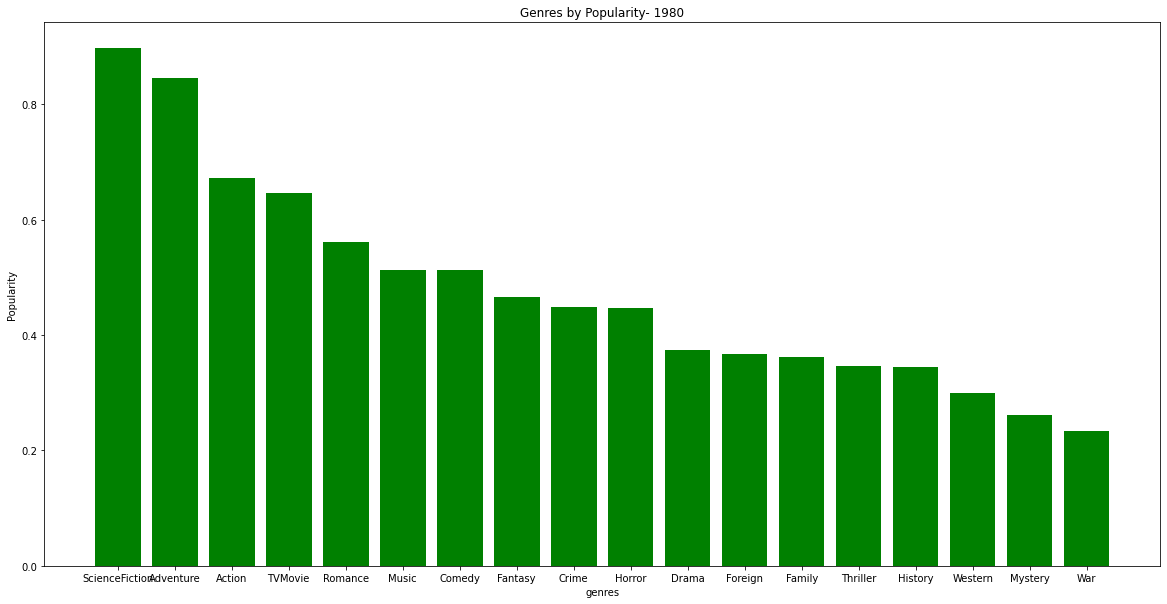

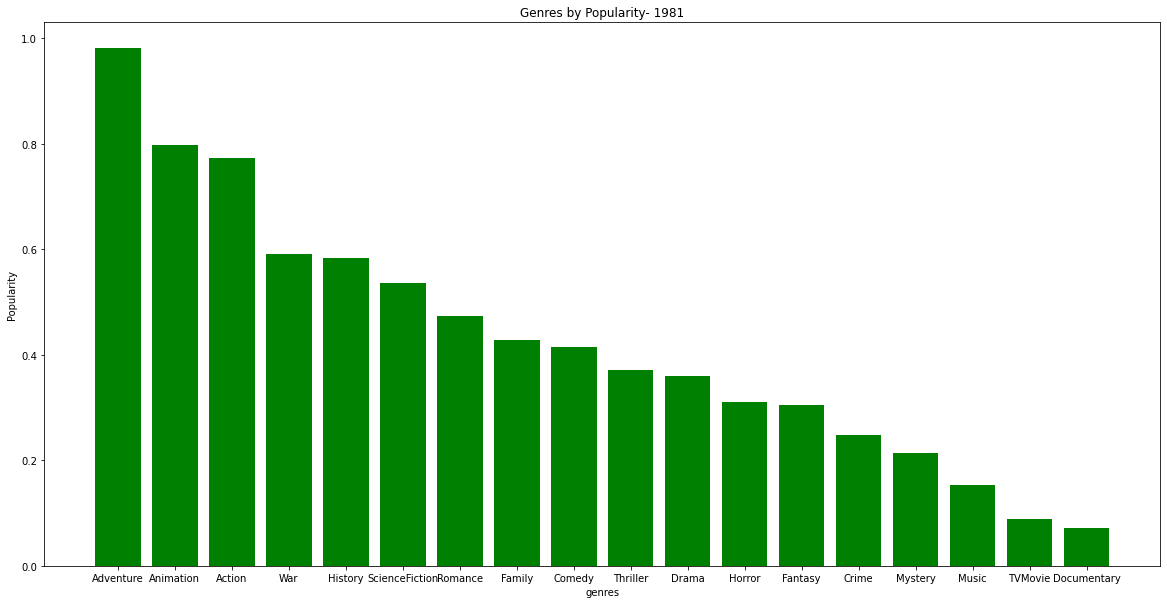

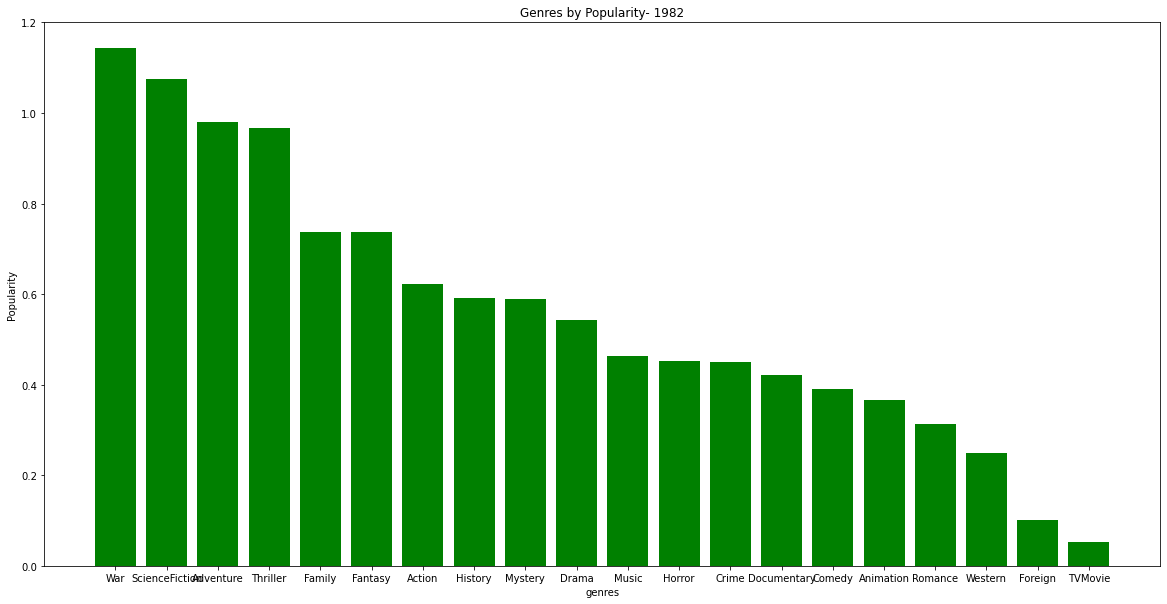

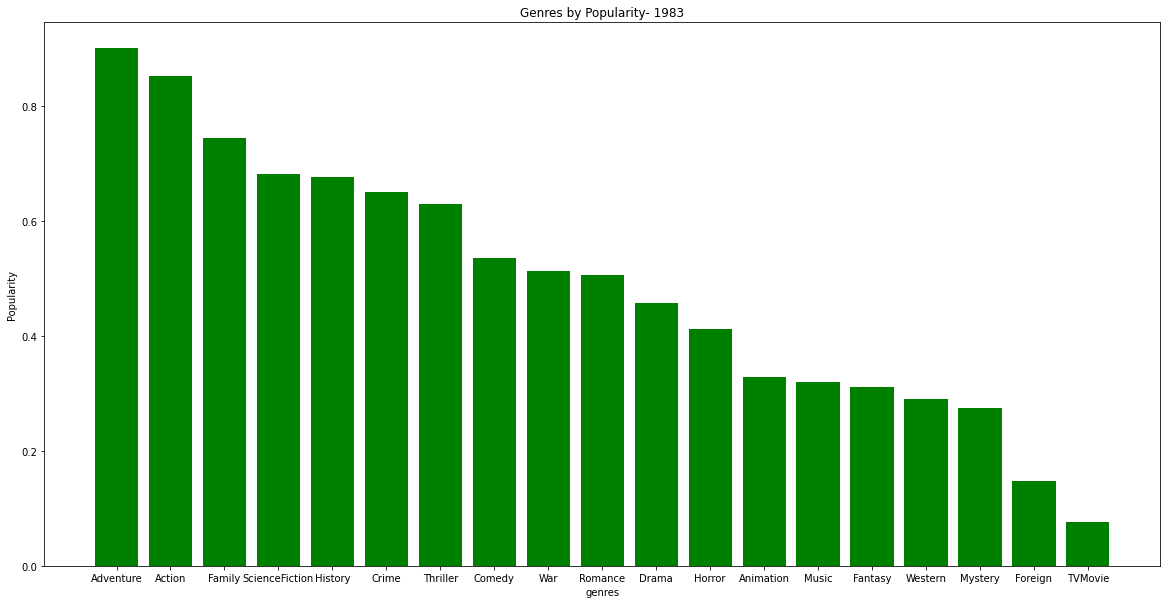

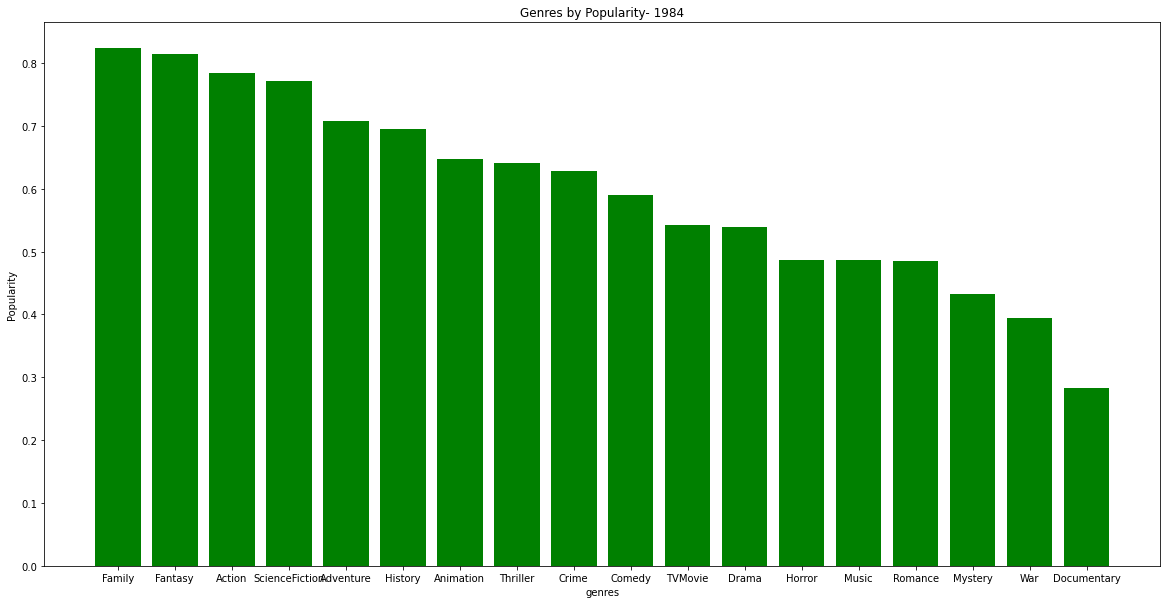

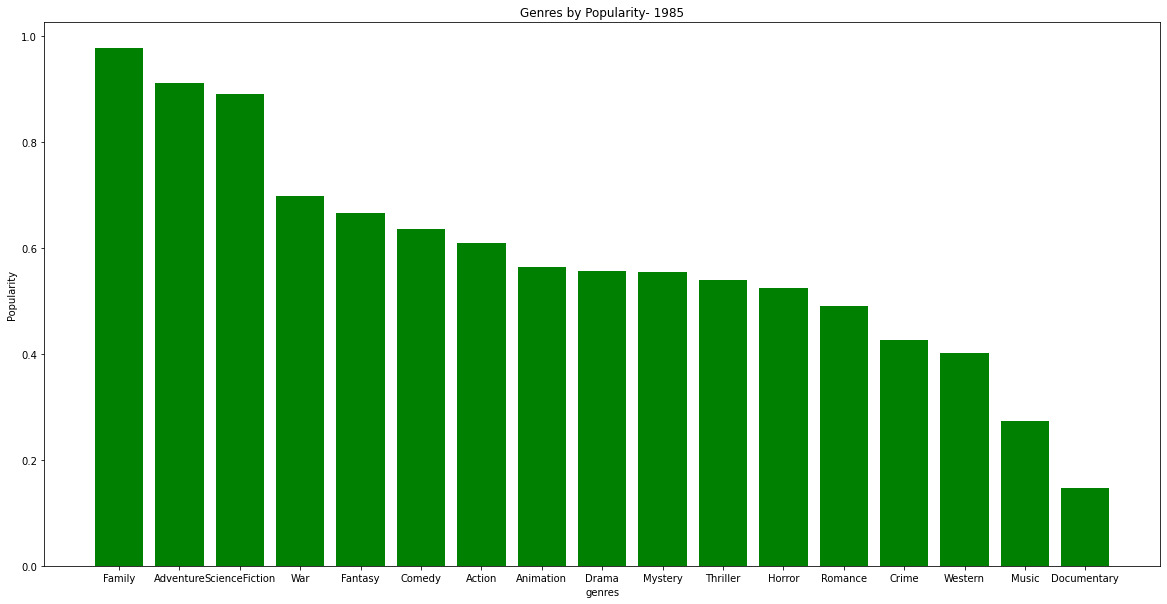

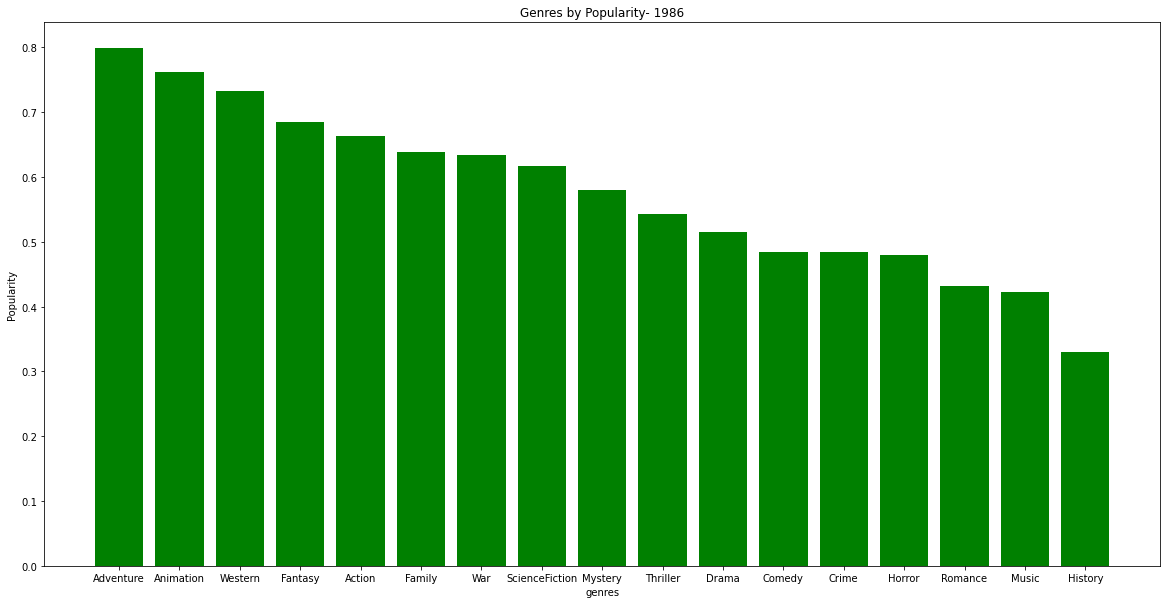

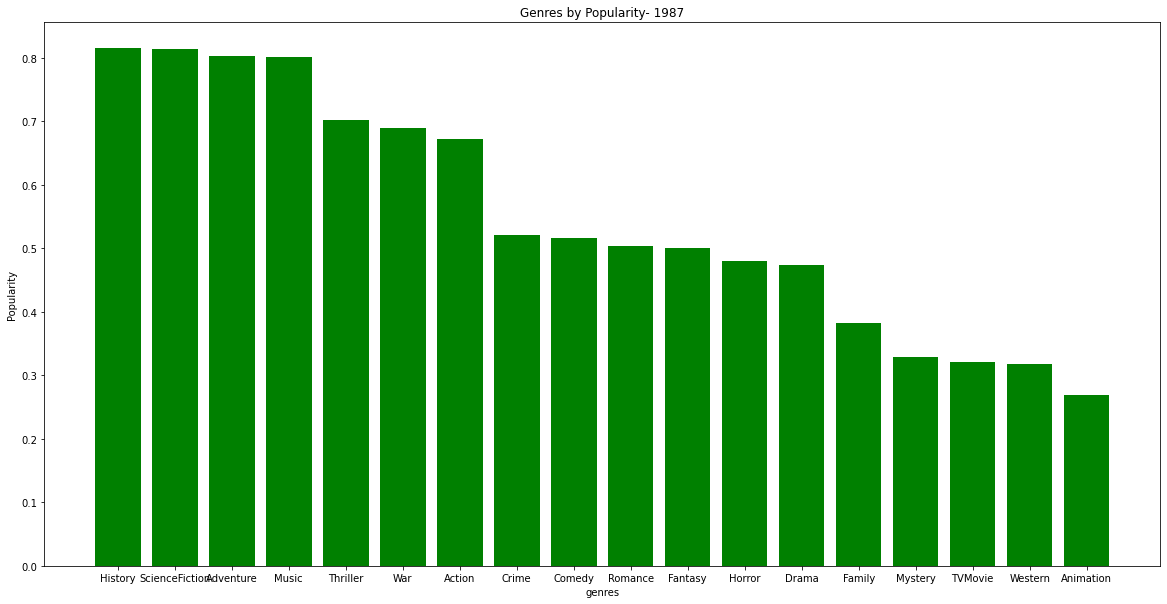

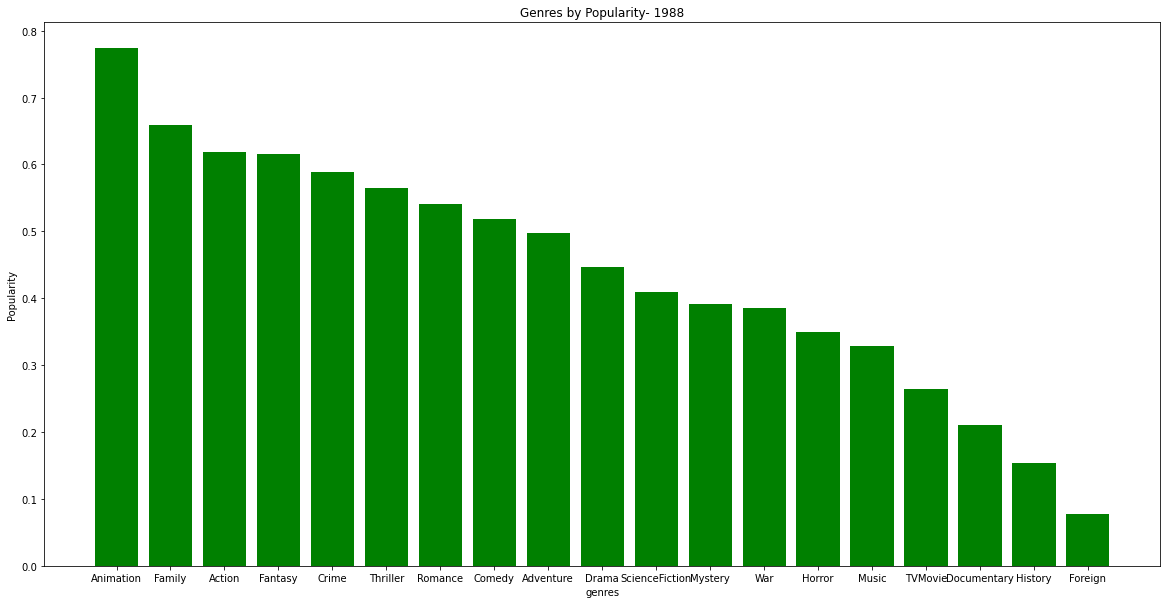

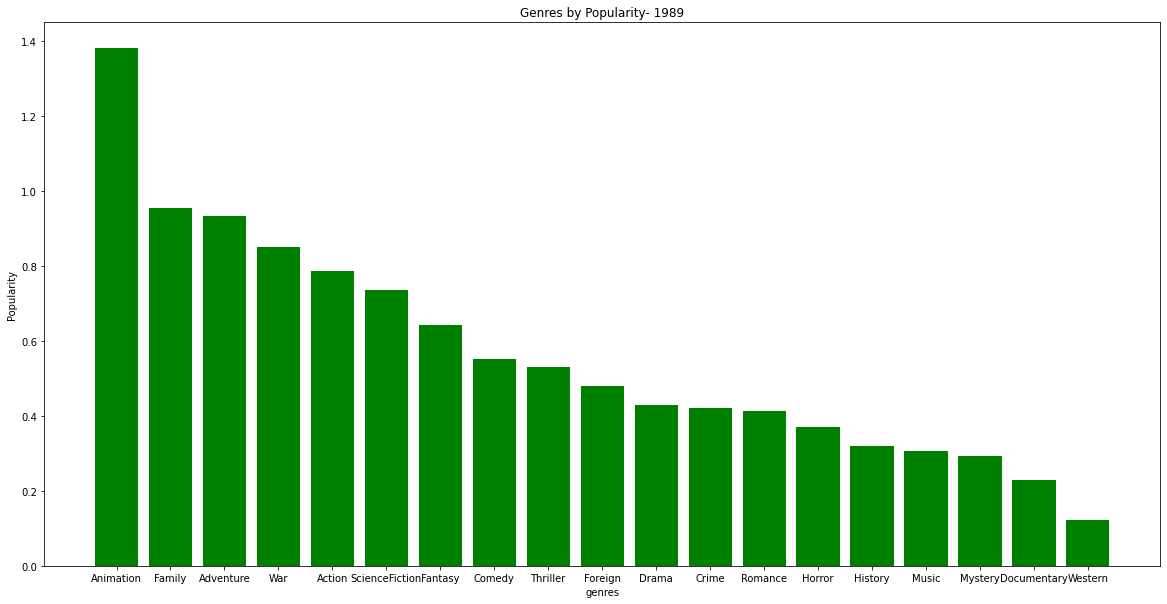

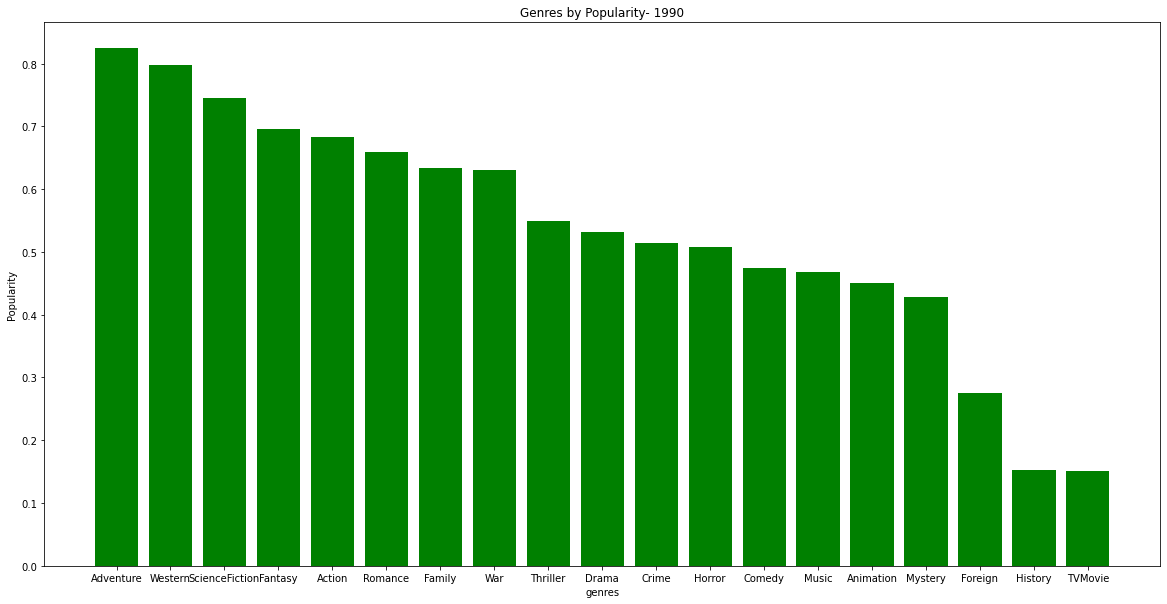

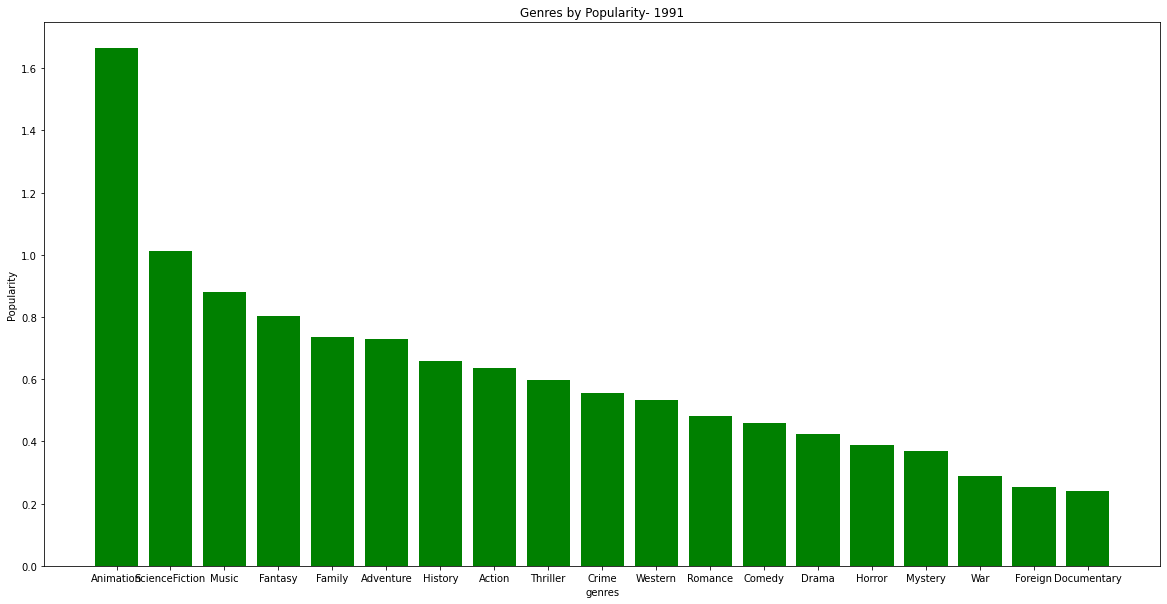

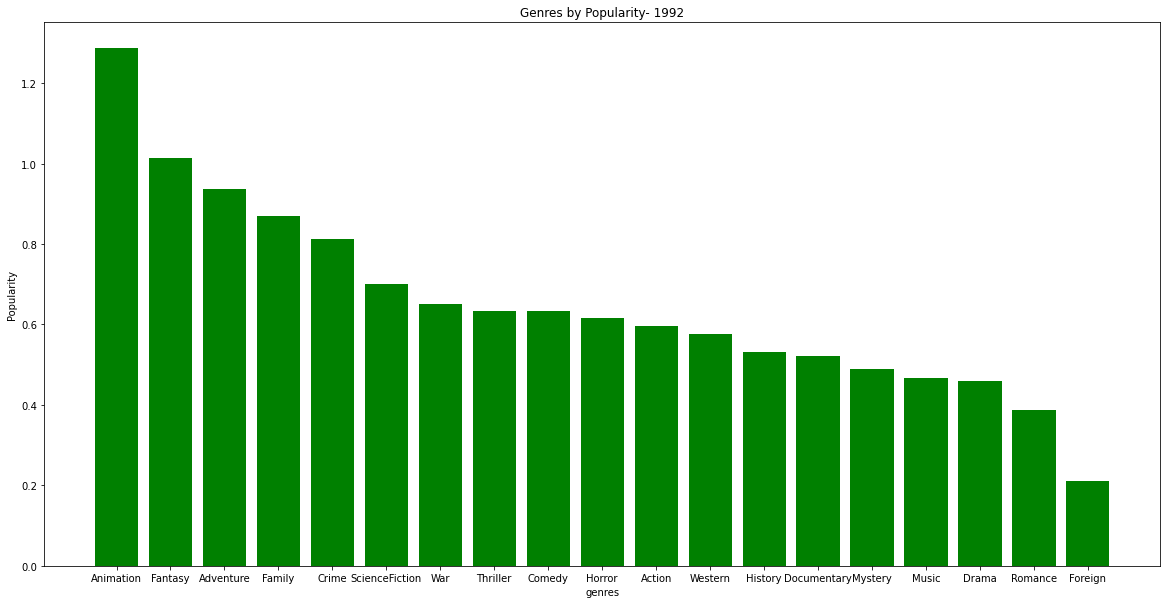

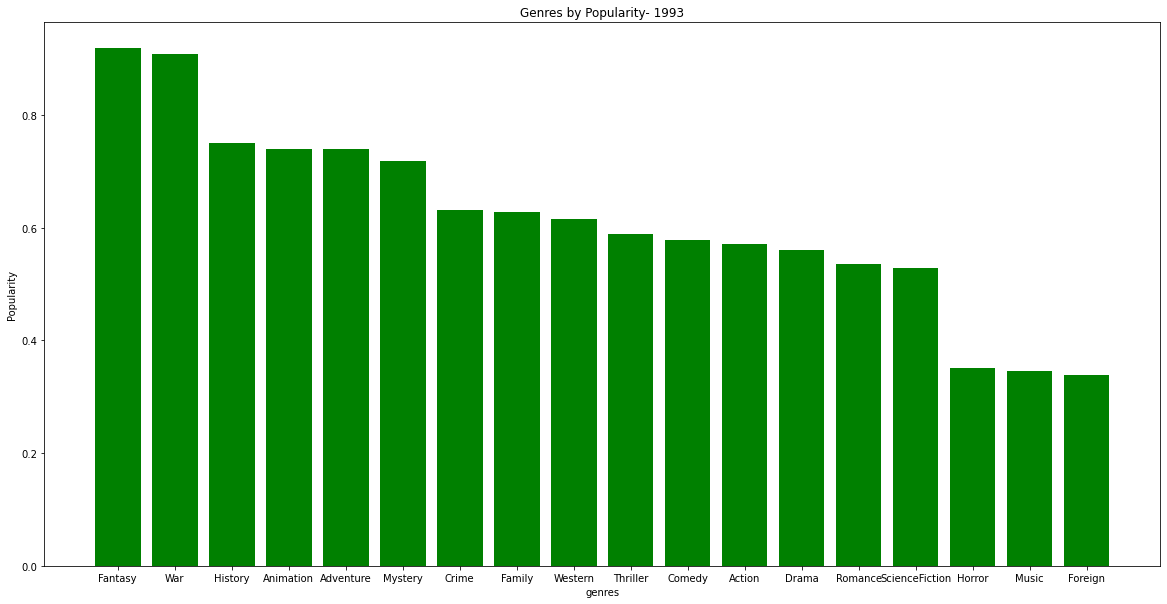

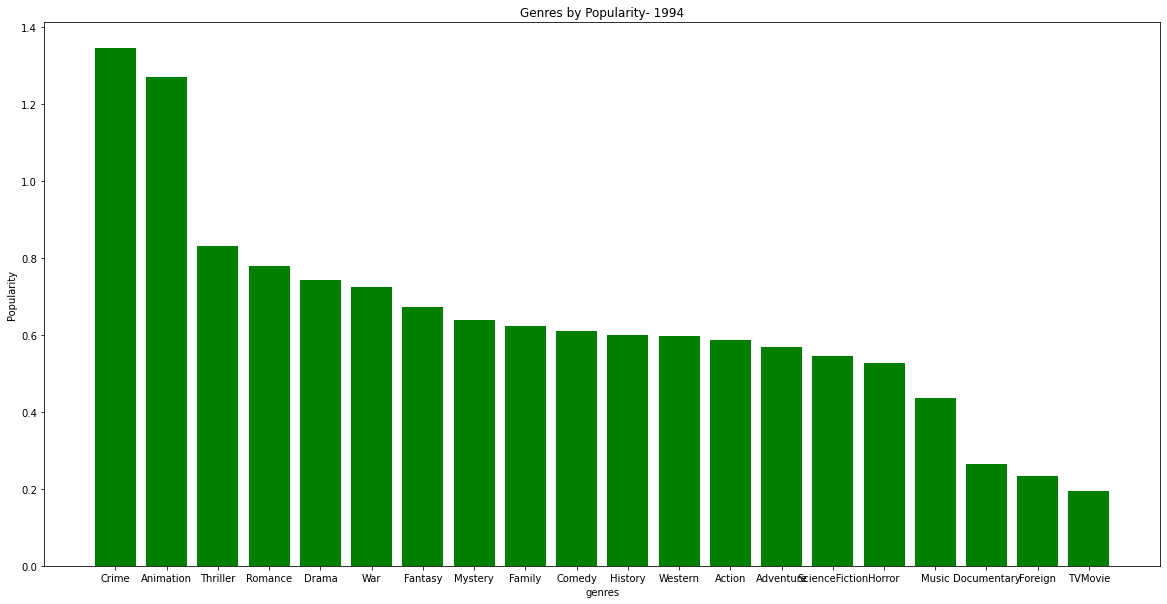

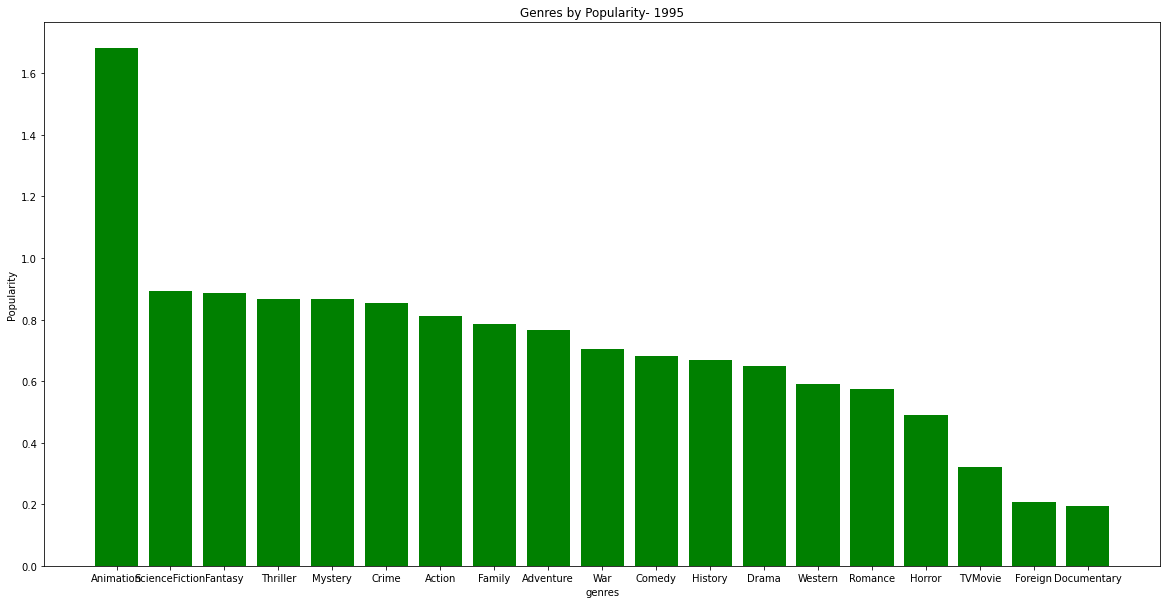

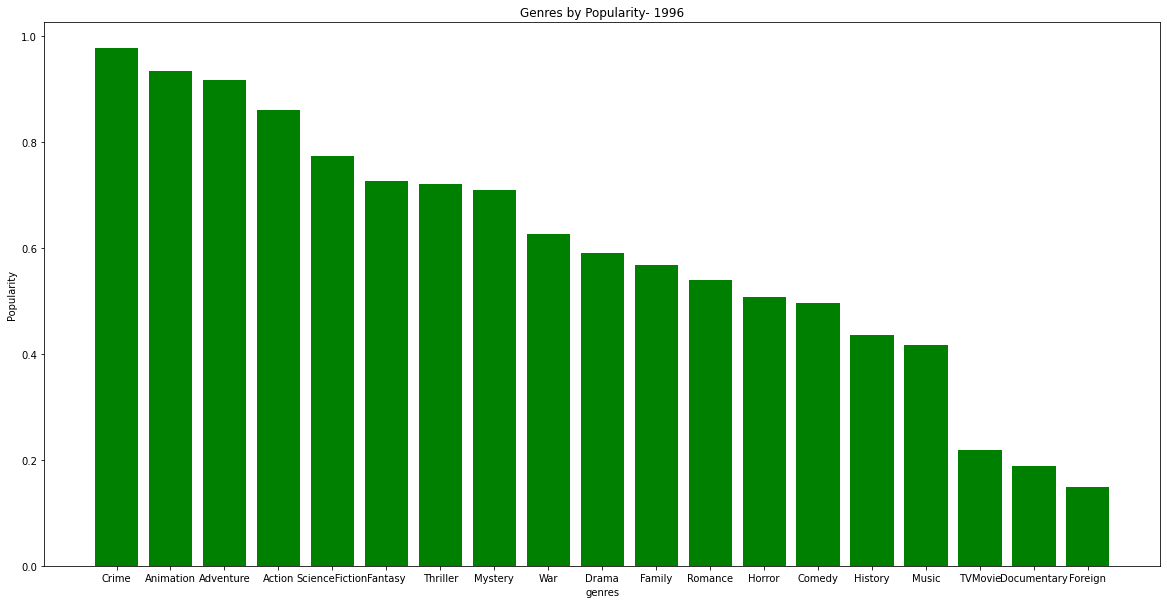

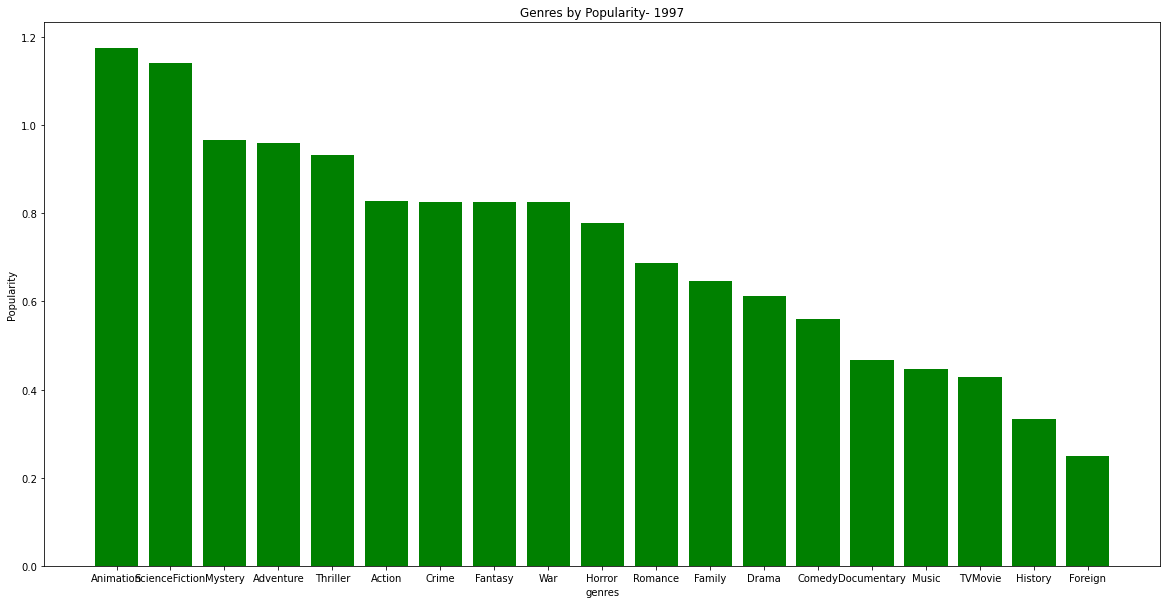

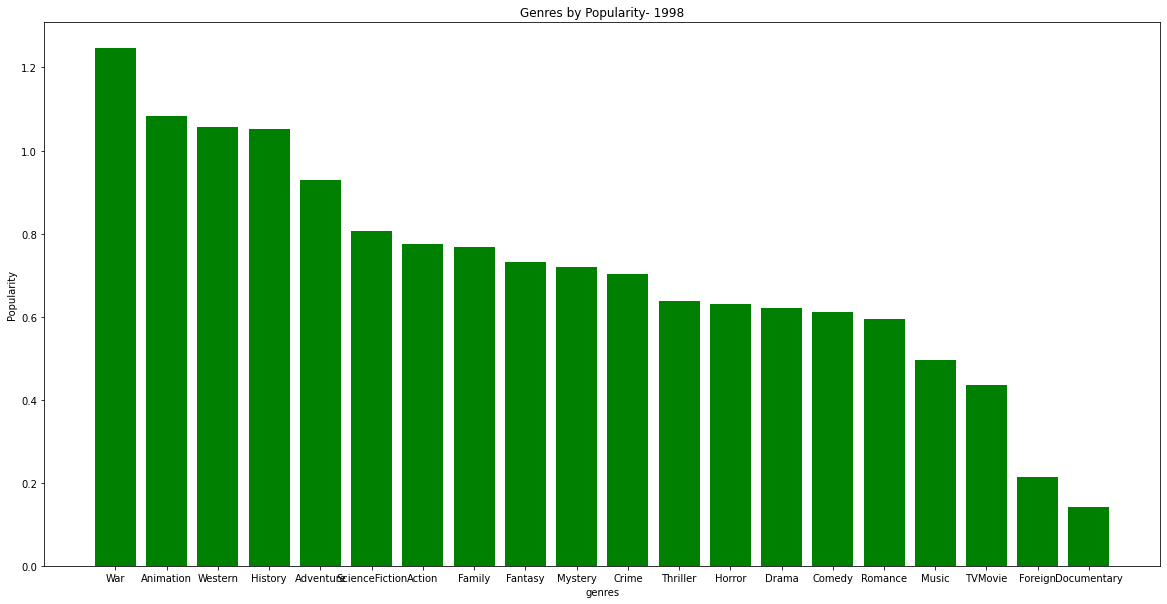

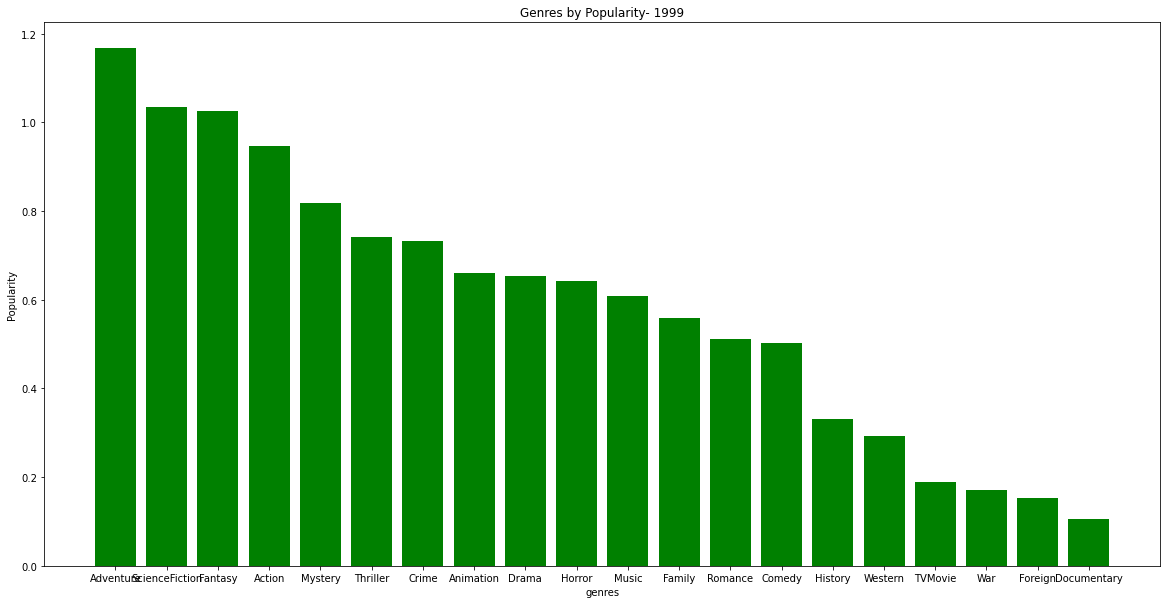

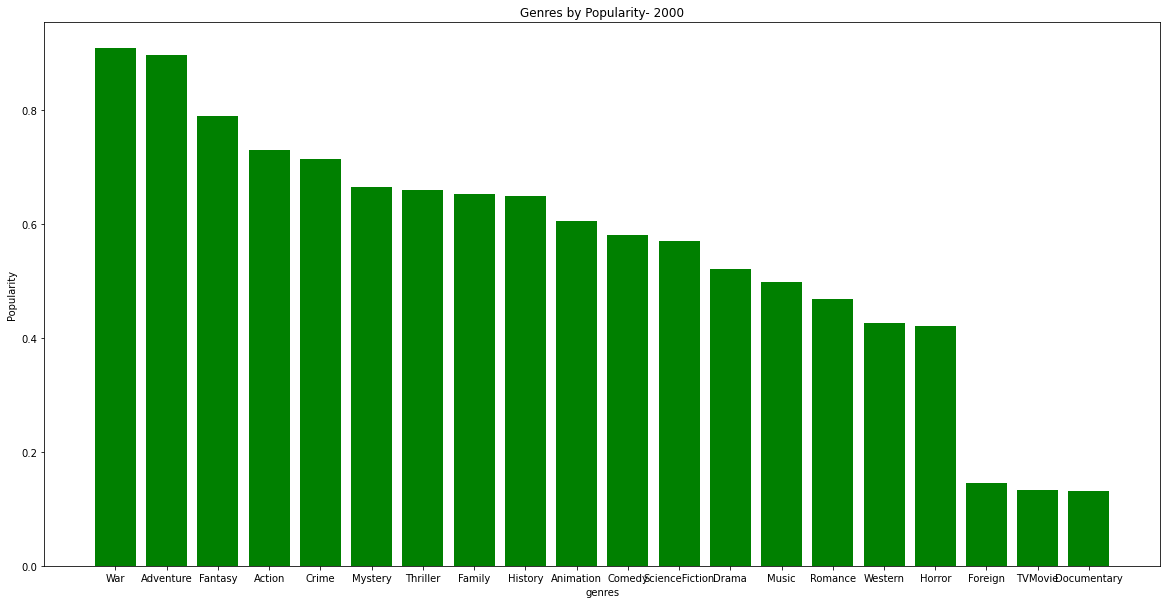

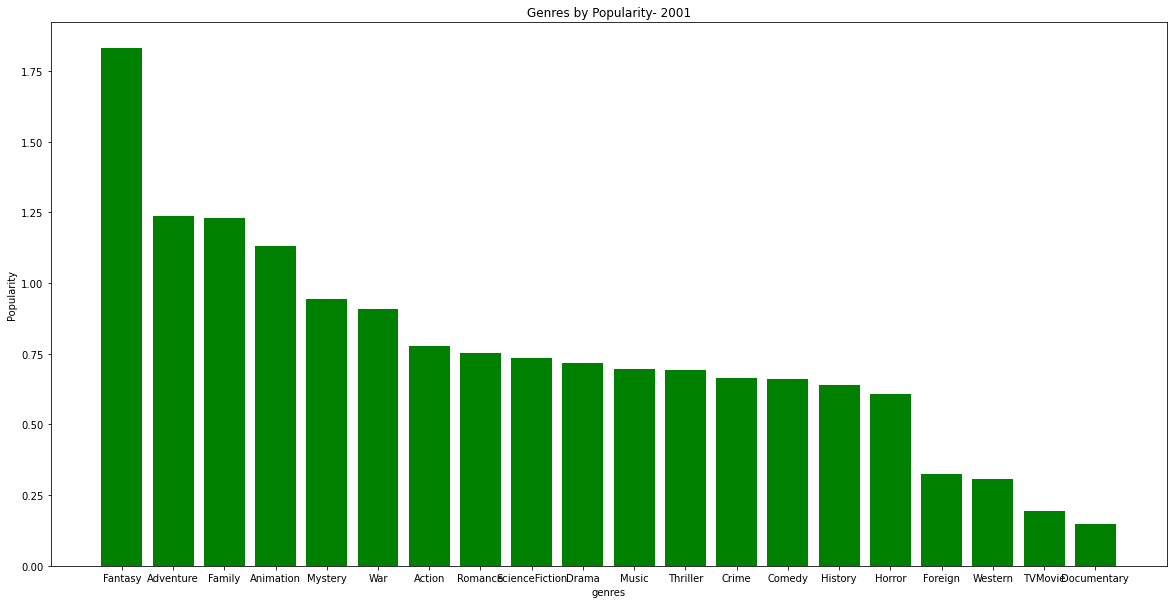

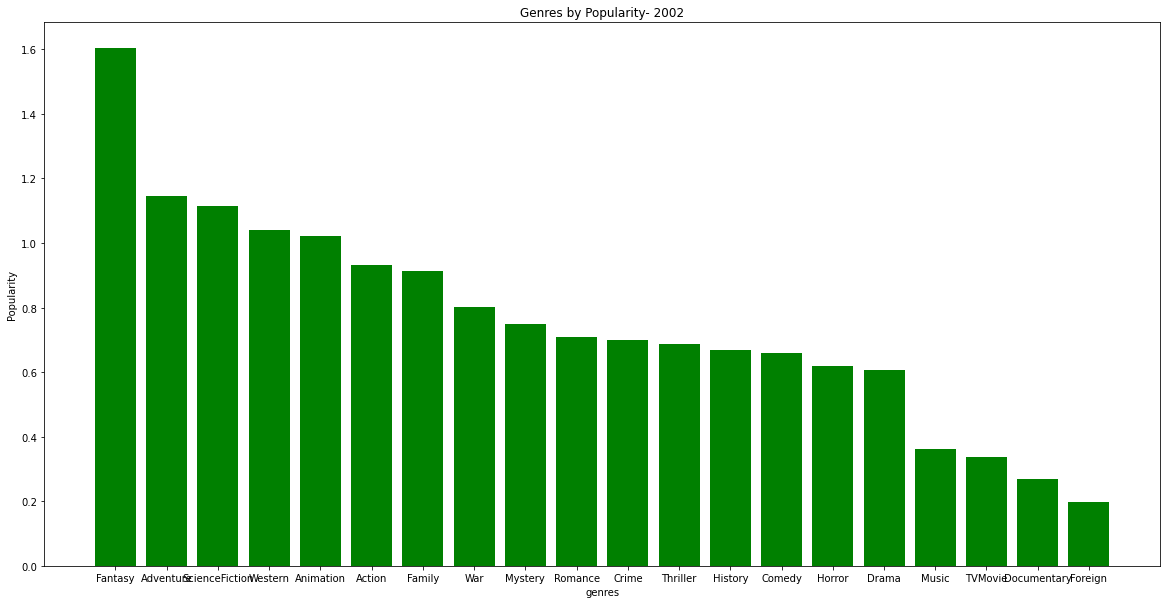

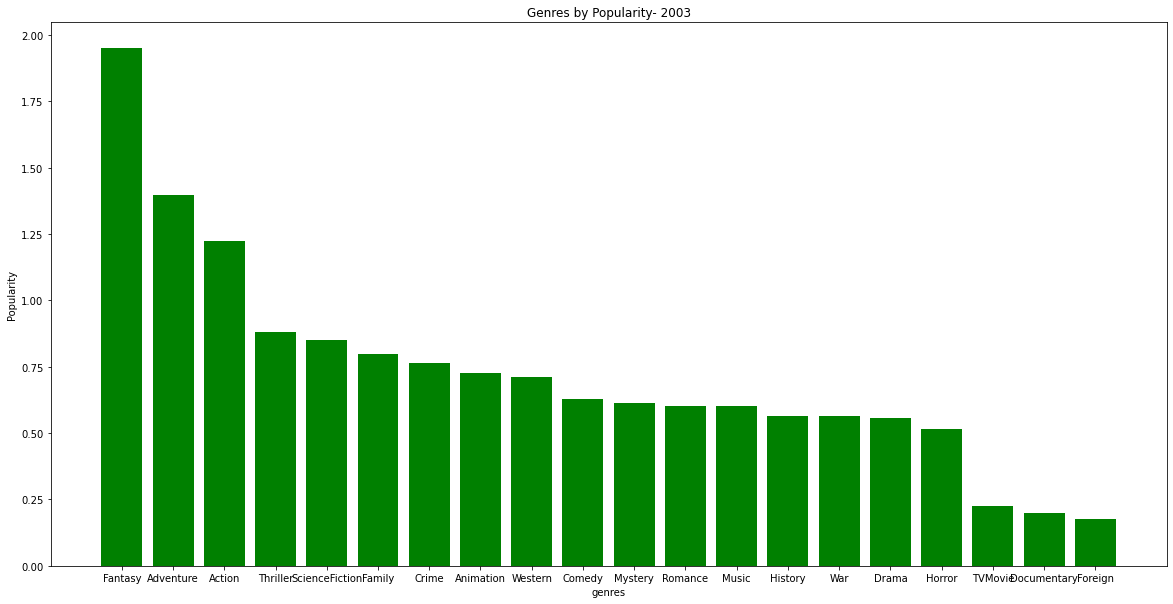

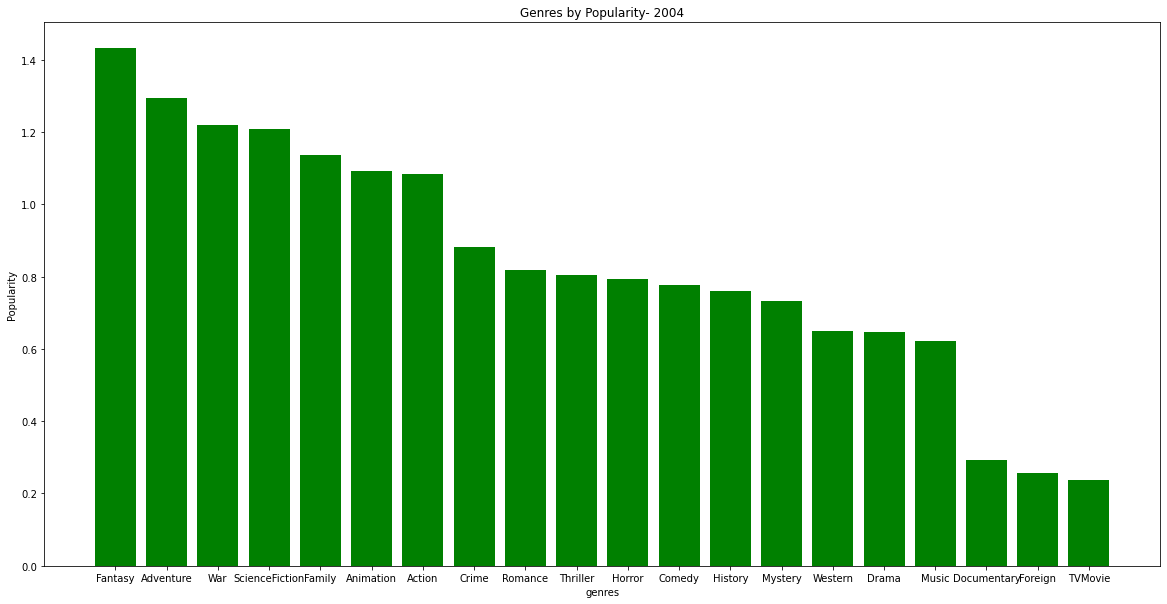

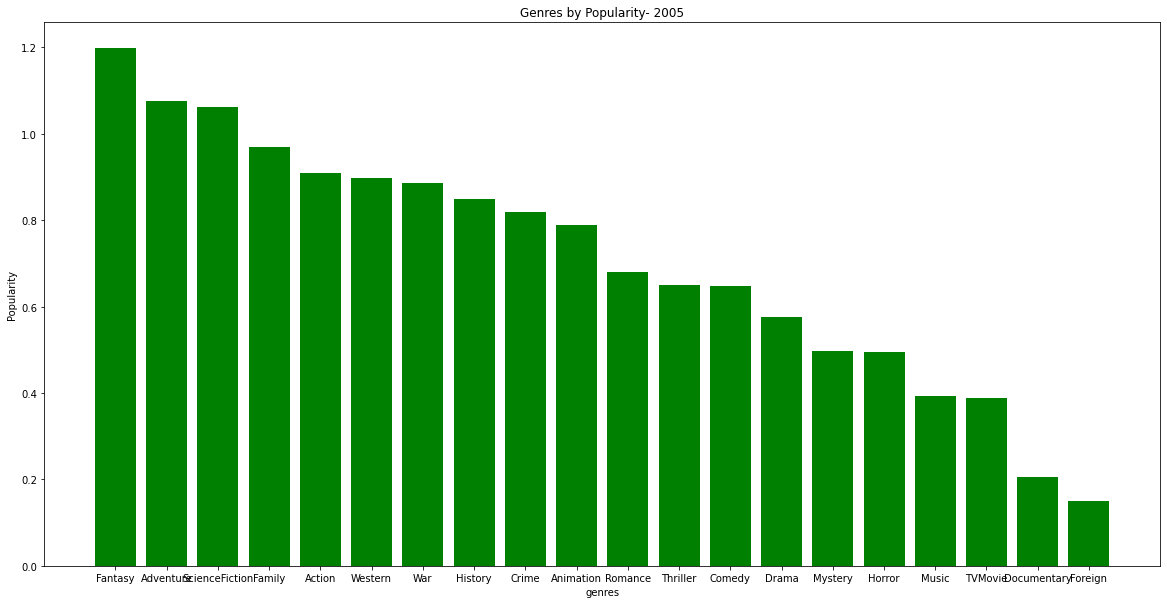

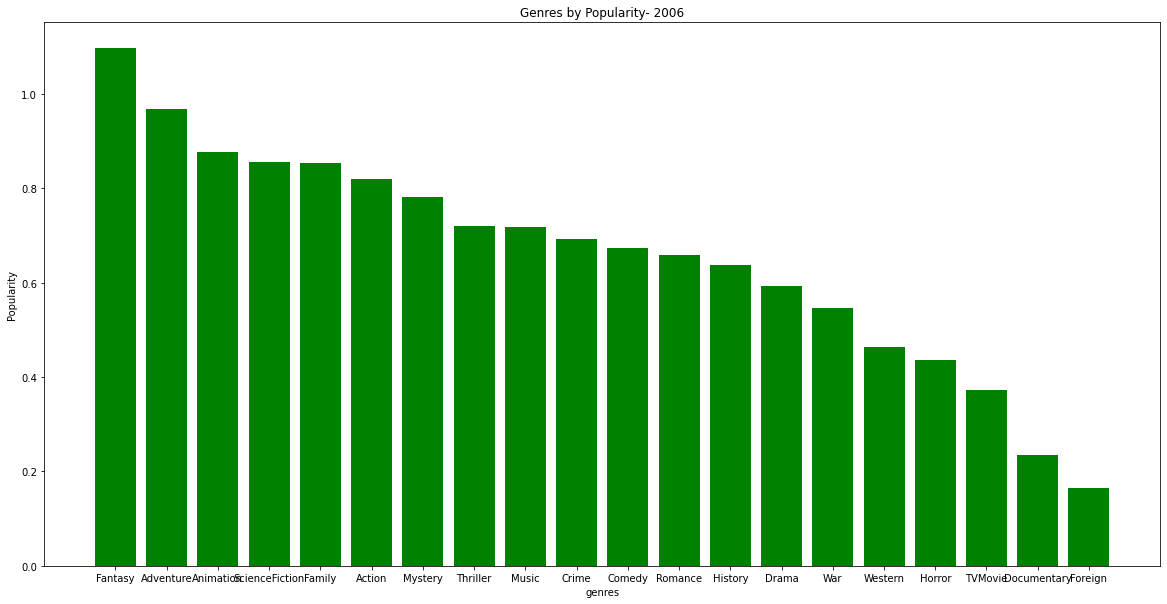

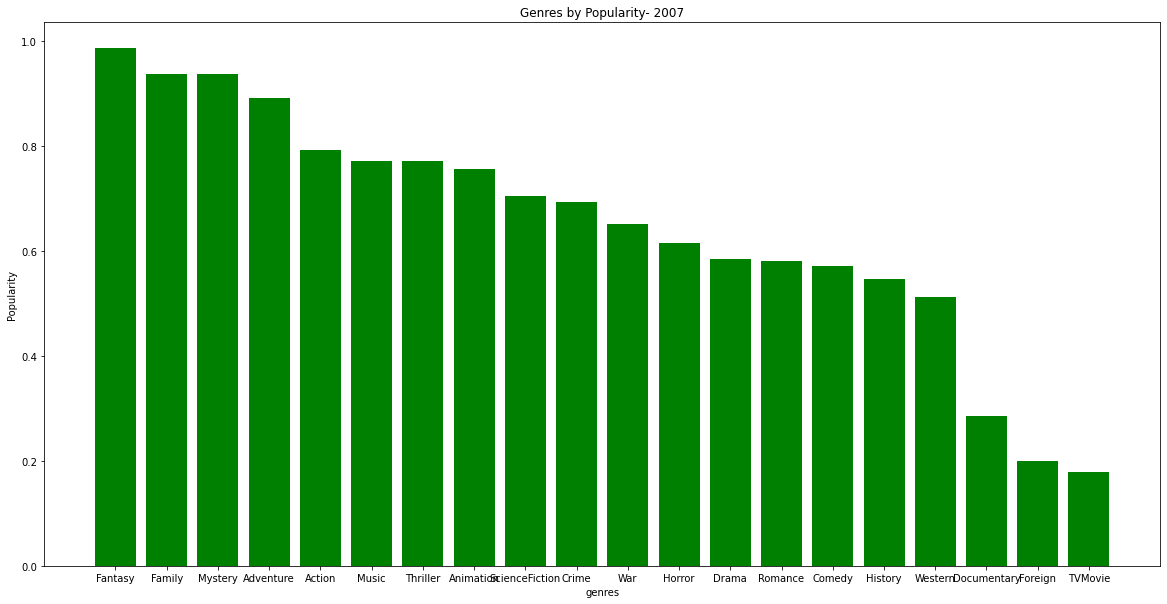

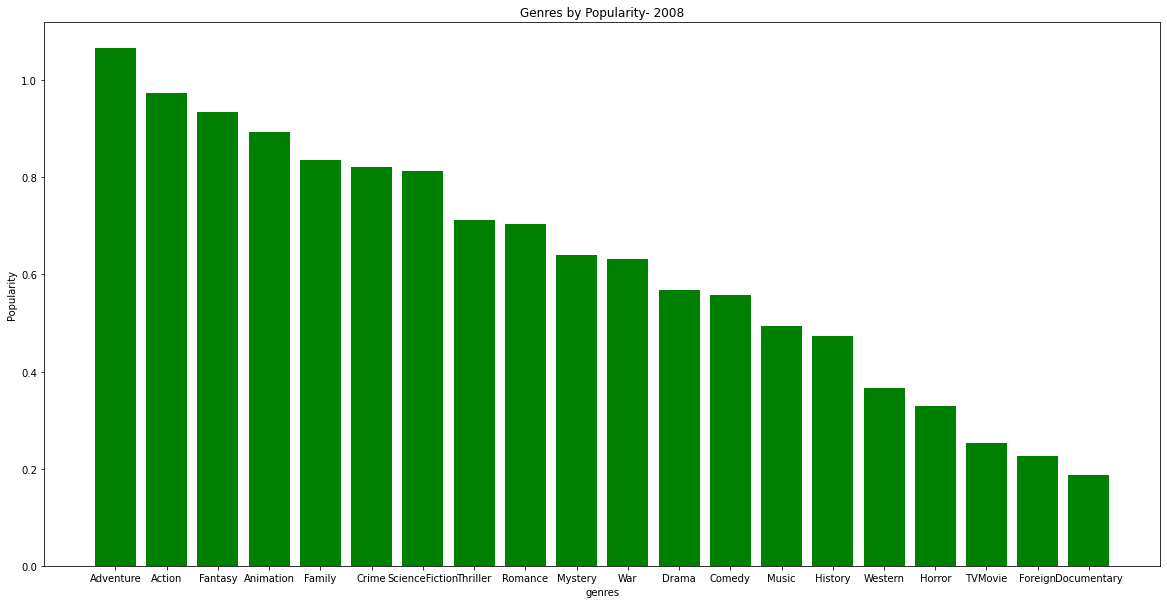

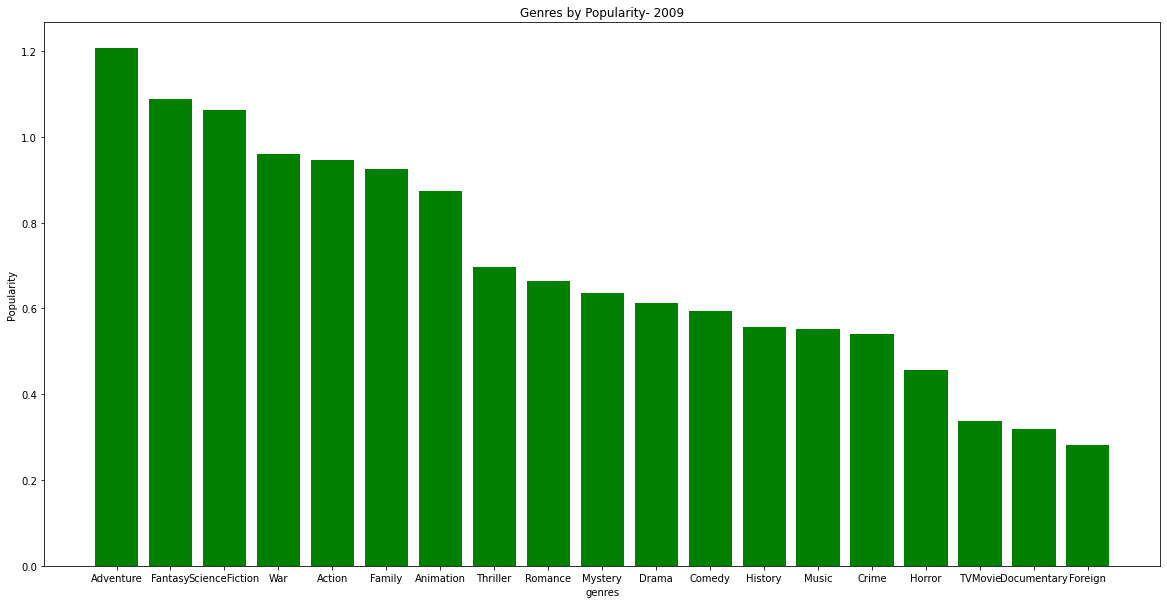

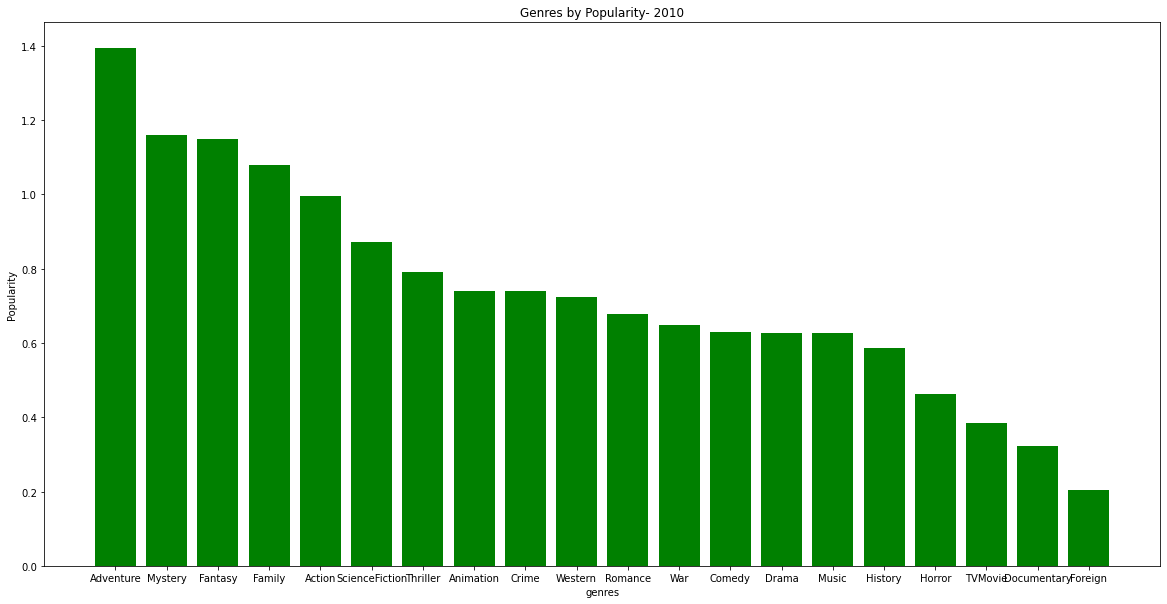

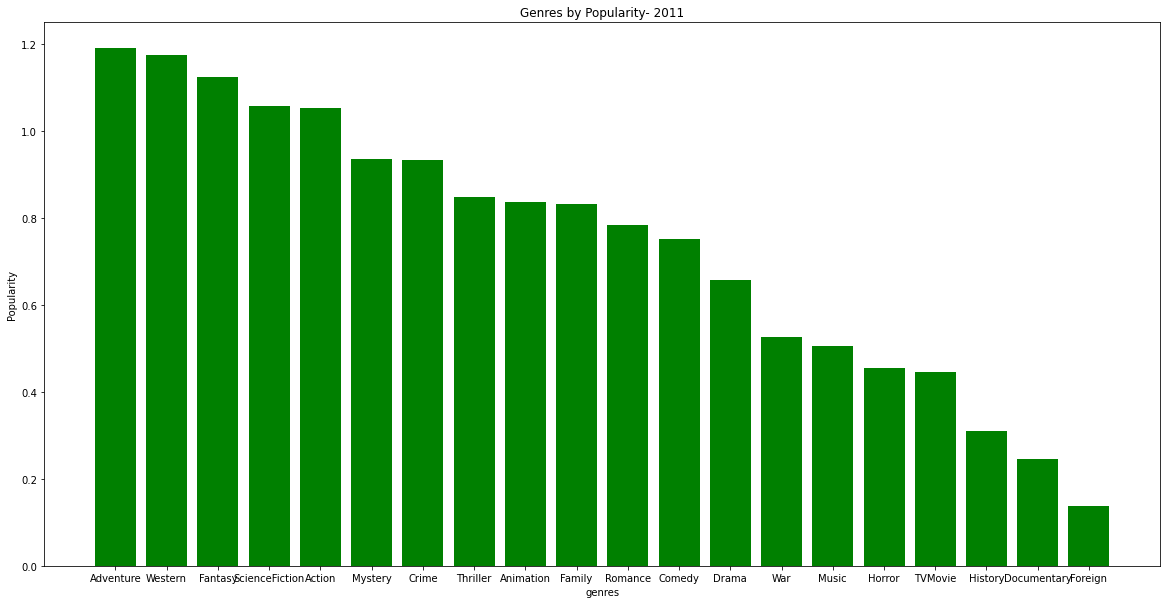

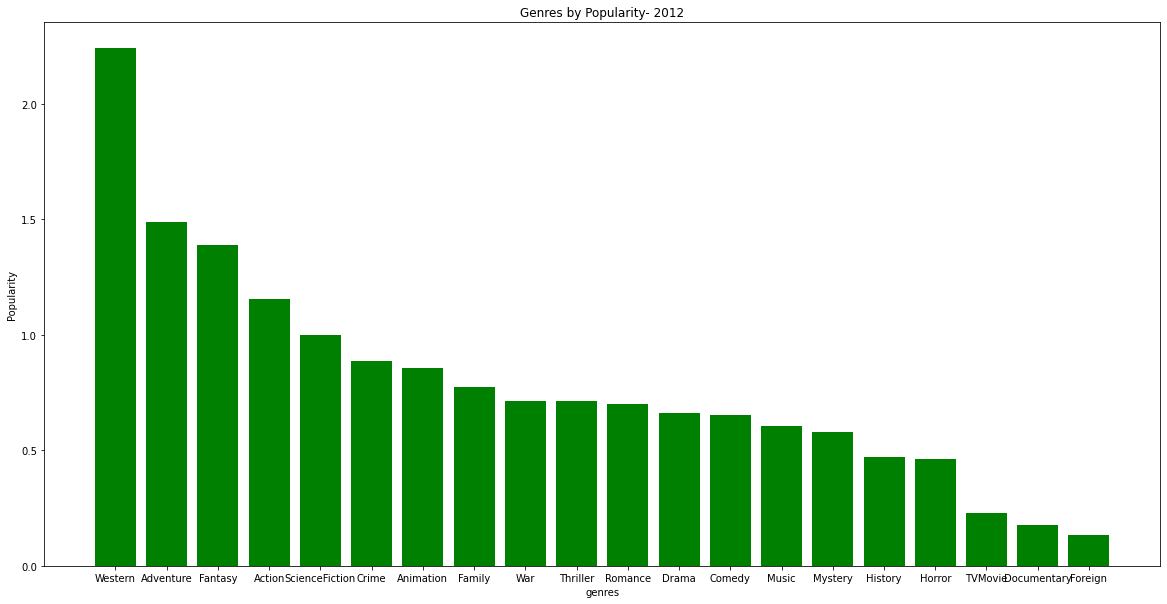

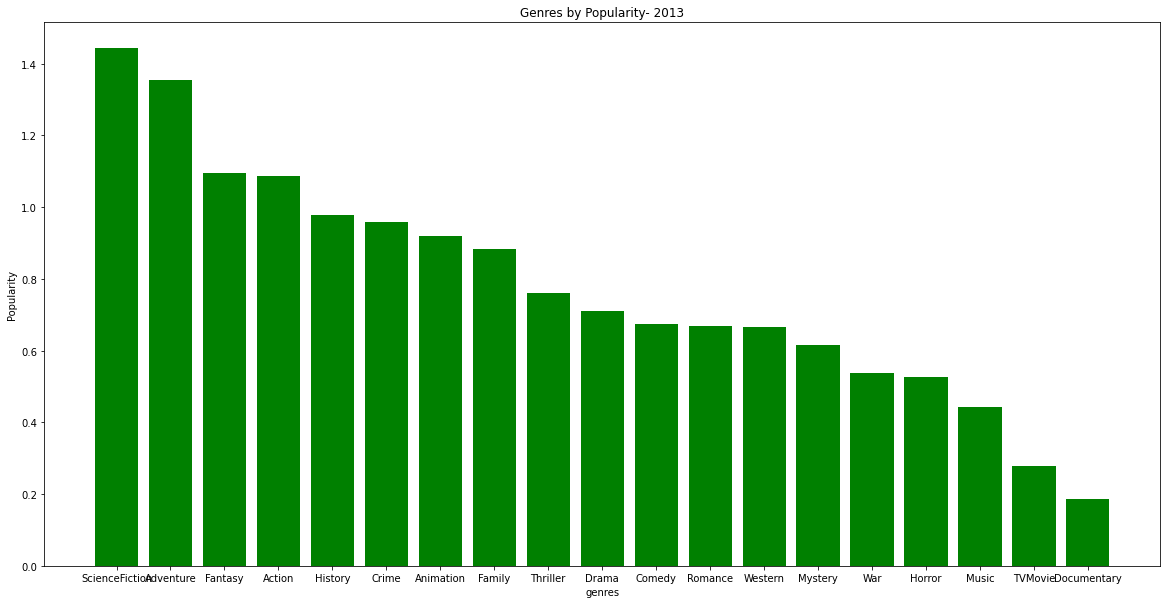

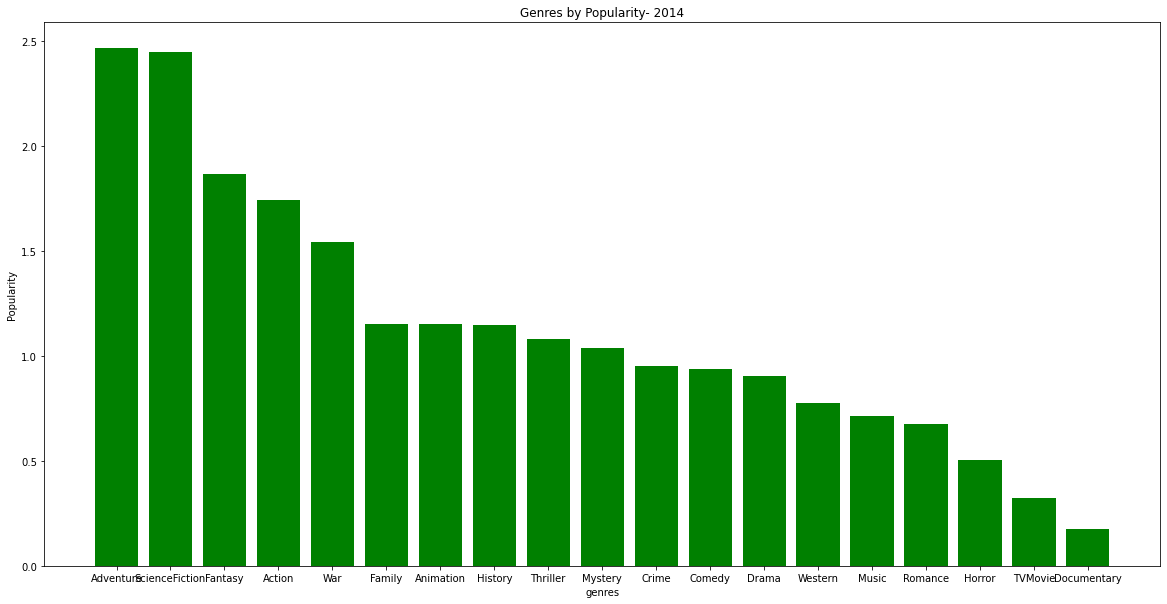

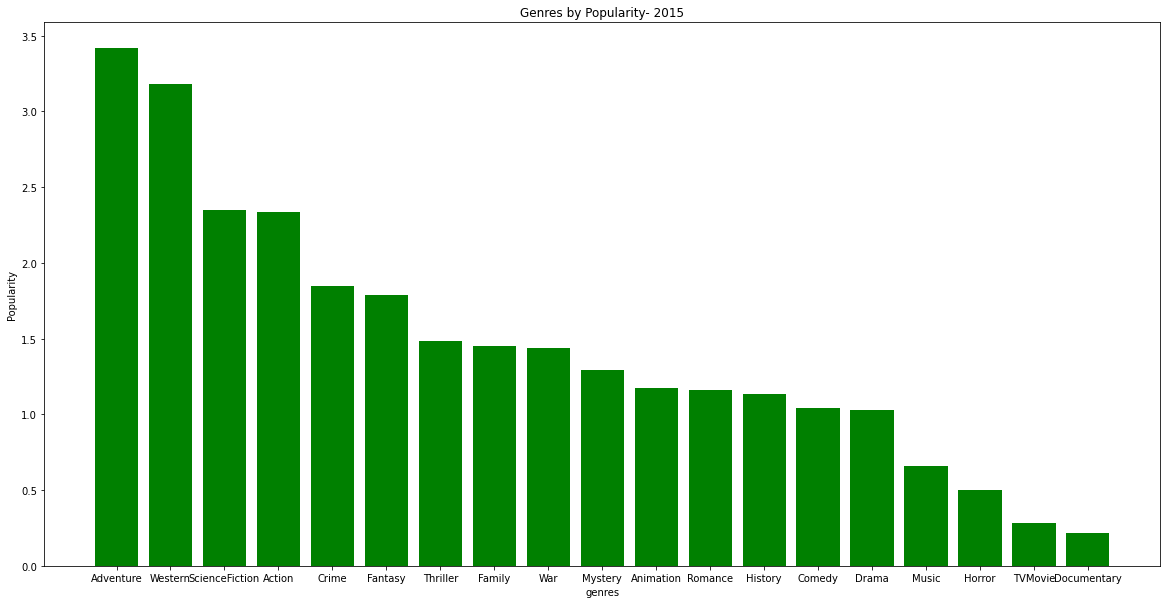

In [52]:
for n in release_year:
    gen_pop = df_main.query(f'release_year=={n}').groupby(['genres'])['popularity'].mean().sort_values(ascending=False)
    gen_pop
    fig, ax = plt.subplots(figsize=(20,10))
    ax.bar(gen_pop.index, gen_pop, color='g')
    ax.set(title=f'Genres by Popularity- {n}', ylabel='Popularity', xlabel='genres');

### My observation from the above visual
> Adventure, science fiction, fantasy and wastern genres had the highest population within 2001 to 2015, while horror, documentory, tv Movie and foreign were the least popular genres within same year.

### Research Question 2 :What kinds of properties are associated with movies that have high revenues?

In [53]:
#getting all rows where the revenue is greater than the mean of the revenue column
df_high_rev = df_main.query('revenue > revenue.mean()')
df_high_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5288.000000,5.288000e+03,5.288000e+03,5288.000000,5288.000000,5288.000000,5288.000000,5.288000e+03,5.288000e+03
mean,1.821418,6.183576e+07,2.190686e+08,113.371407,950.459153,6.288654,2002.231846,7.076554e+07,2.727016e+08
std,2.018373,5.185732e+07,2.278431e+08,24.839072,1161.403276,0.723519,10.287449,5.293670e+07,2.735901e+08
min,0.010335,0.000000e+00,5.170248e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,4.820430e+07
25%,0.830934,2.500000e+07,8.450012e+07,98.000000,242.000000,5.800000,1997.000000,3.127593e+07,1.040305e+08
50%,1.285301,5.000000e+07,1.398043e+08,110.000000,530.500000,6.300000,2004.000000,5.882658e+07,1.785090e+08
75%,2.100704,8.500000e+07,2.600960e+08,124.000000,1152.000000,6.800000,2010.000000,9.825757e+07,3.354559e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


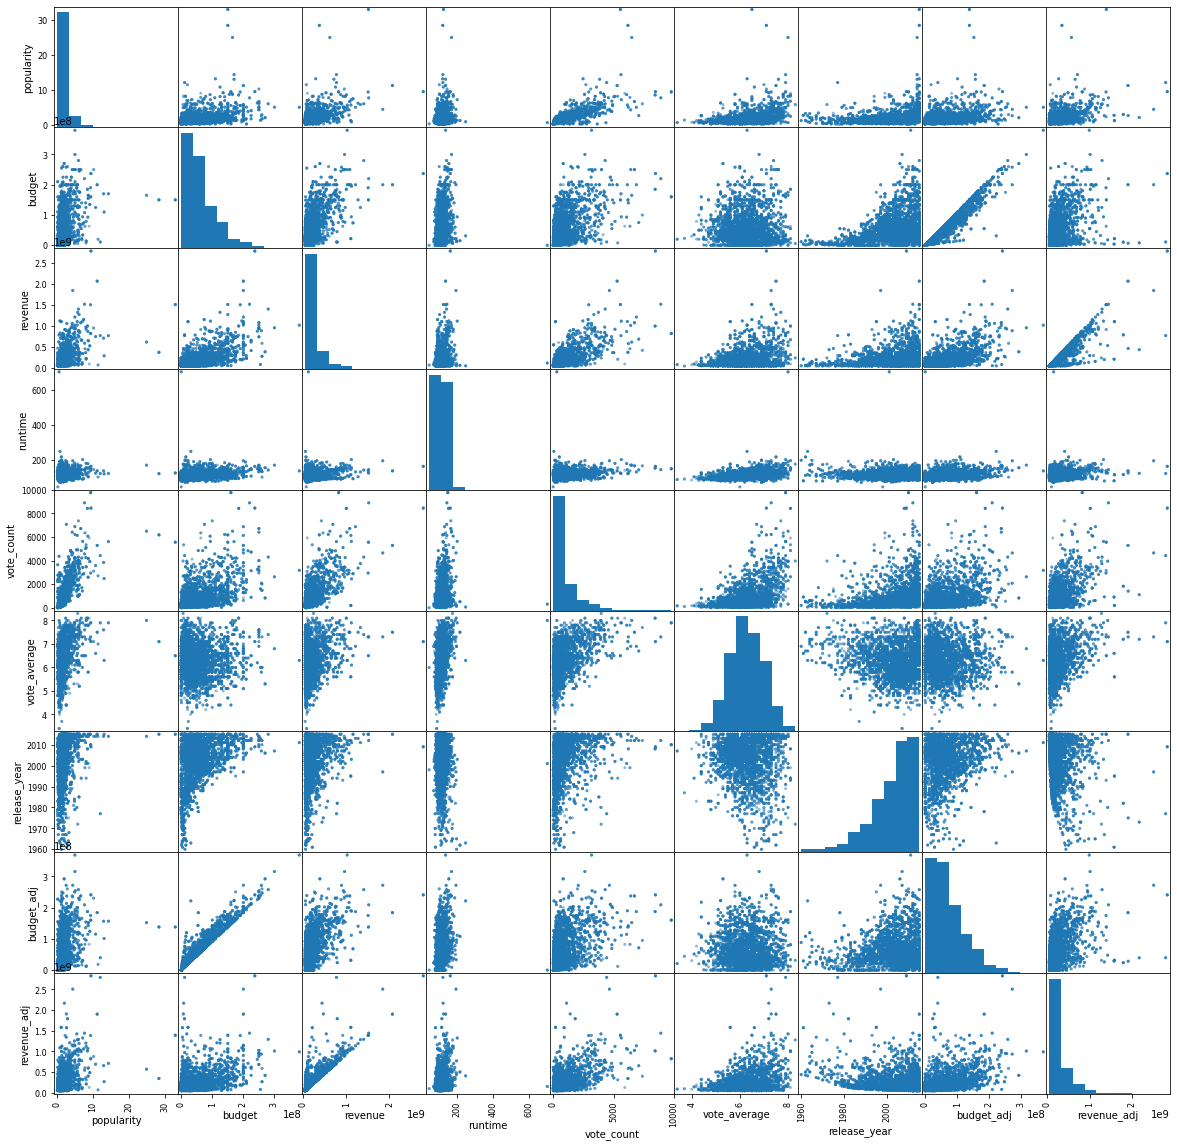

In [54]:
pd.plotting.scatter_matrix(df_high_rev, figsize=(20,20));

### My observation from the above visual and describe table
>Minimum runtime range is within 44.00 to 705.00

>Budget on the average is 6.18357


### Research Question 3 :what is the correlation between runtime and revenue

In [55]:
df_main.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,24712.000000,2.471200e+04,2.471200e+04,24712.000000,24712.000000,24712.000000,24712.000000,2.471200e+04,2.471200e+04
mean,0.749568,1.901552e+07,5.169251e+07,103.201764,270.731871,5.956624,2000.327412,2.285051e+07,6.634592e+07
std,1.149369,3.575007e+07,1.372845e+08,27.846046,662.437486,0.897062,12.953708,3.937155e+07,1.676301e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.246822,0.000000e+00,0.000000e+00,91.000000,20.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,0.440812,1.200000e+06,1.295000e+02,100.000000,51.000000,6.000000,2004.000000,1.938796e+06,1.335515e+02
75%,0.834049,2.315000e+07,3.759747e+07,113.000000,196.000000,6.600000,2010.000000,3.049201e+07,5.426034e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [56]:
#get the range for runtime so that we can use it to plot our visuals
bin = [0,91,100,113,887]
labels = ['short', 'medium','mod_long','long']
df_main['runtime_len'] = pd.cut(df_main['runtime'], bin, labels=labels)
df_main.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_len
0,5.462138,190000000,209035668,Tomorrowland,Brad Bird,inventor|apocalypse|destiny|imax|dreamer,130,Action,Walt Disney Pictures|Babieka|A113,1899,6.2,2015,1.747999e+08,1.923127e+08,long
1,3.339135,175000000,331926147,The Good Dinosaur,Peter Sohn,tyrannosaurus rex|friends|animation|alternate ...,93,Adventure,Walt Disney Pictures|Pixar Animation Studios|B...,1087,6.6,2015,1.609999e+08,3.053719e+08,medium
2,3.237370,50000000,71561644,Run All Night,Jaume Collet-Serra,hitman|revenge|murder|on the run|mobster,114,Action,Vertigo Entertainment|Energy Entertainment|Rat...,814,6.3,2015,4.599998e+07,6.583668e+07,long
3,2.976436,135000000,368871007,Home,Tim Johnson,friendship|spaceship|space|alien|alien invasion,94,Fantasy,Twentieth Century Fox Film Corporation|DreamWo...,1060,6.9,2015,1.241999e+08,3.393612e+08,medium
4,2.885126,4000000,9064511,The Lobster,Yorgos Lanthimos,dystopia,118,Thriller,Haut et Court|Eurimages|Lemming Film|Element P...,638,6.6,2015,3.679998e+06,8.339346e+06,long


In [57]:
#grouping the datafame by runtime length and getting their mean revenue
rev = df_main.groupby(['runtime_len']).mean().revenue.sort_values(ascending=False)
rev

runtime_len
long        1.093319e+08
mod_long    4.639156e+07
medium      3.468124e+07
short       2.072045e+07
Name: revenue, dtype: float64

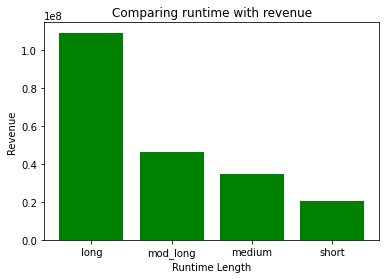

In [58]:
plt.bar(rev.index, rev, color='g')
plt.title('Comparing runtime with revenue')
plt.xlabel('Runtime Length')
plt.ylabel('Revenue');

### Observation from the analysis above
> The longer the movie runtime, the larger the revenue. Therefore, long movies tend to generate high revenues and vice versa

### Research Question 4 :what is the correlation between runtime and popularity

In [59]:
pop = df_main.groupby(['runtime_len']).mean().popularity.sort_values(ascending=False)
pop

runtime_len
long        1.170162
mod_long    0.749643
medium      0.620055
short       0.493538
Name: popularity, dtype: float64

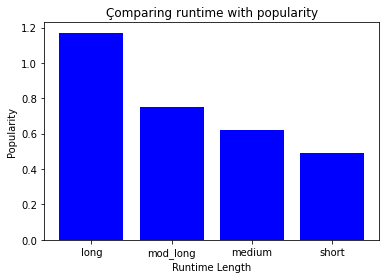

In [60]:
plt.bar(pop.index, pop, color='b')
plt.title('Çomparing runtime with popularity')
plt.xlabel('Runtime Length')
plt.ylabel('Popularity');

### Observation from the analysis above
> Longer movies are more popular than shorter movies

### Research Question 5 :Which genre creates the most revenue

In [61]:
gen = df_main.groupby(['genres'])['revenue'].mean().sort_values(ascending=False)
gen

genres
Adventure         1.200849e+08
Fantasy           1.047530e+08
Animation         8.250435e+07
Family            8.070636e+07
Action            7.759165e+07
ScienceFiction    7.580132e+07
War               4.962703e+07
Crime             4.415599e+07
Thriller          4.411671e+07
Mystery           4.204428e+07
Comedy            4.134420e+07
Romance           3.886724e+07
History           3.470387e+07
Music             3.416027e+07
Drama             3.179121e+07
Western           2.946148e+07
Horror            1.801710e+07
Documentary       3.029630e+06
Foreign           1.482569e+06
TVMovie           3.181818e+05
Name: revenue, dtype: float64

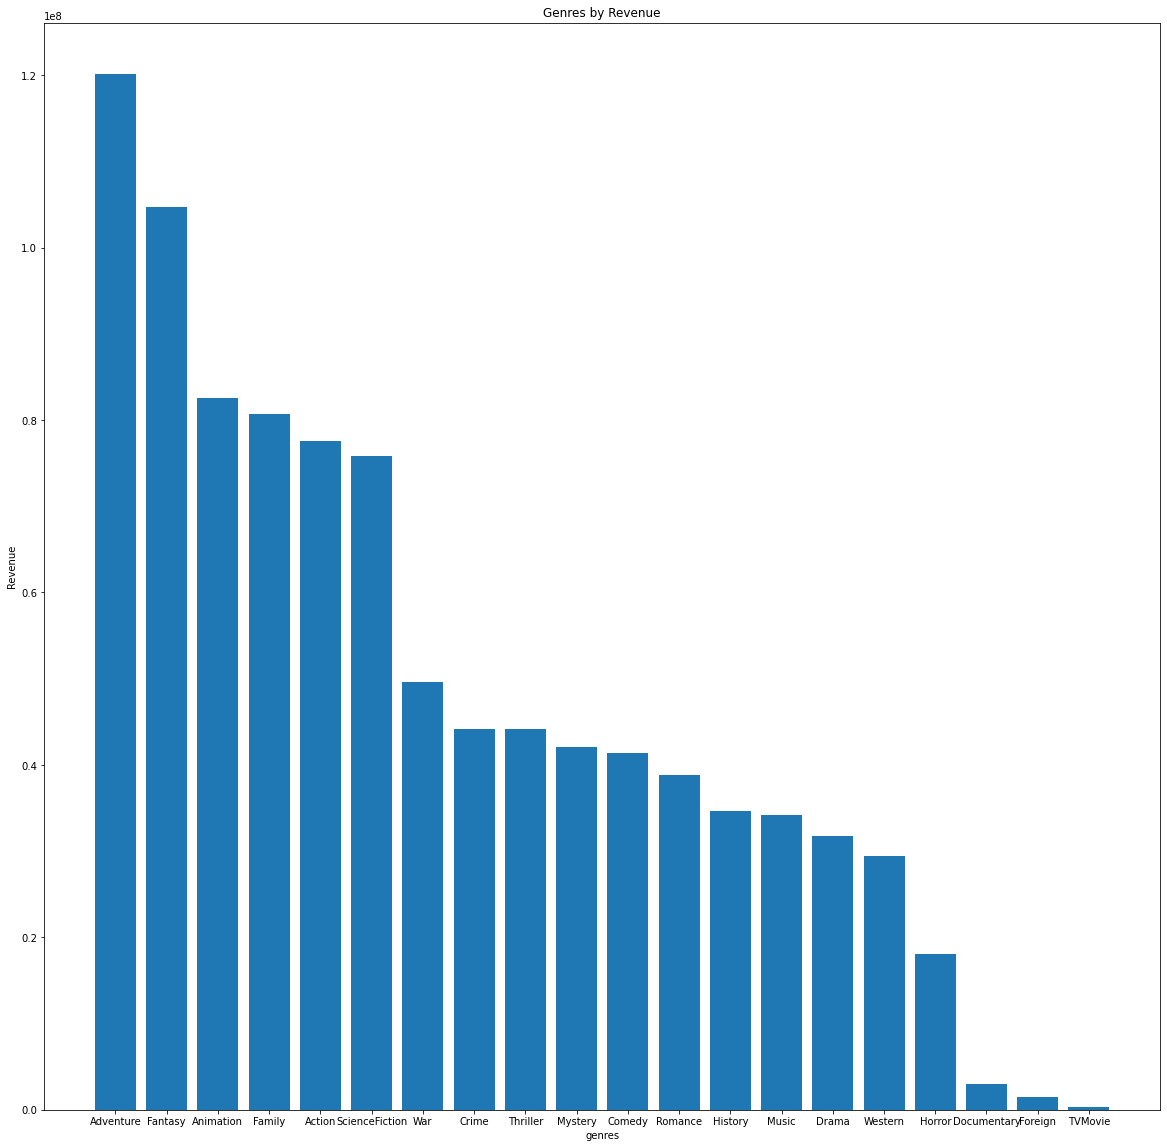

In [62]:
fig, ax = plt.subplots(figsize=(20,20))
ax.bar(gen.index, gen)
ax.set(title=f'Genres by Revenue', ylabel='Revenue', xlabel='genres');

### Observation from the analysis above
> Advebture, fantasy, animation, family and action movies generates the most revenue with adventure and fantasy leading by far

>On the other hand, Horror, Documentary, foreign and tv movie generates the least revenue

### Research Question 6 :Top ten movies per revenue

In [63]:
mov = df_main.groupby(['original_title']).revenue.mean().sort_values(ascending=False)
mov = mov.head(10)
mov

original_title
Avatar                                          2.781506e+09
Star Wars: The Force Awakens                    2.068178e+09
Jurassic World                                  1.513529e+09
Furious 7                                       1.506249e+09
Avengers: Age of Ultron                         1.405036e+09
Harry Potter and the Deathly Hallows: Part 2    1.327818e+09
Iron Man 3                                      1.215440e+09
Minions                                         1.156731e+09
The Avengers                                    1.151799e+09
Transformers: Dark of the Moon                  1.123747e+09
Name: revenue, dtype: float64

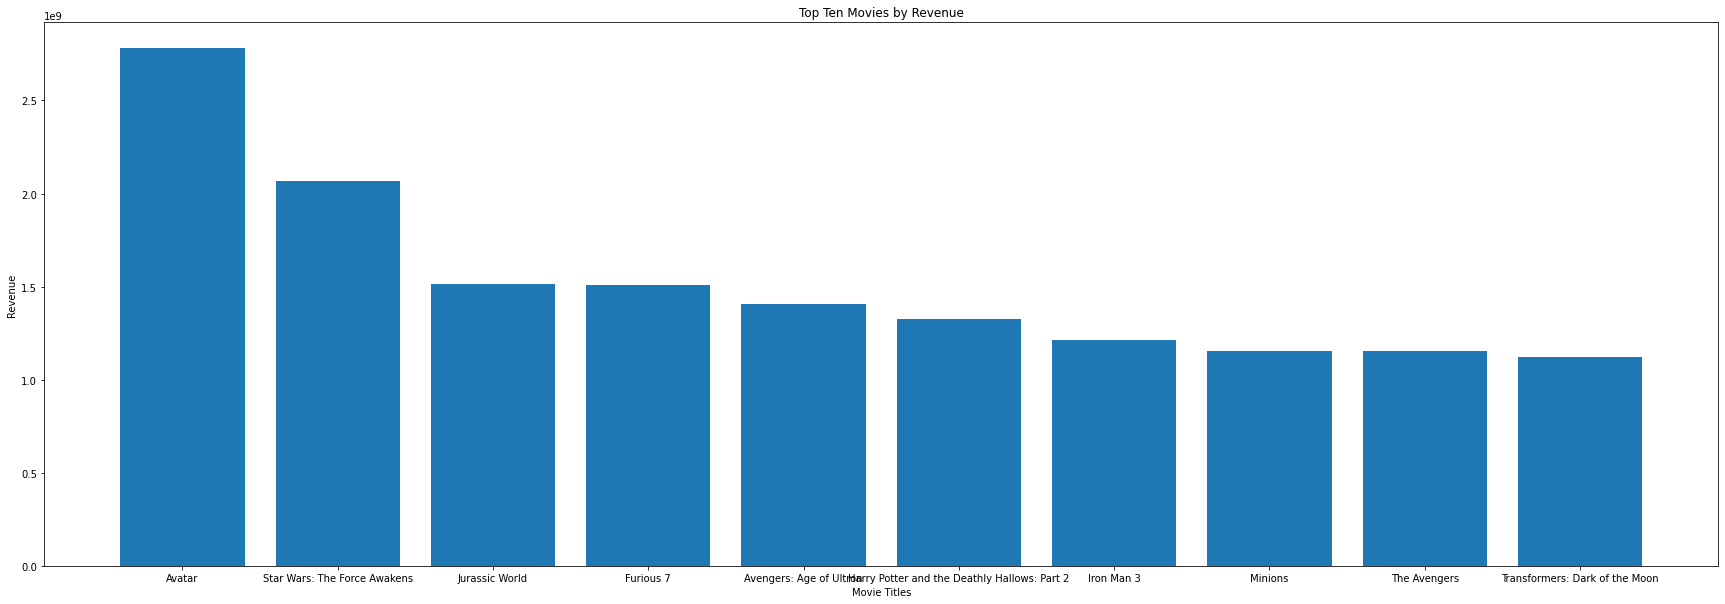

In [64]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(mov.index, mov)
ax.set(title=f'Top Ten Movies by Revenue', ylabel='Revenue', xlabel='Movie Titles');


### Observation from the analysis above
> Avartar generated the highest revenue within the years


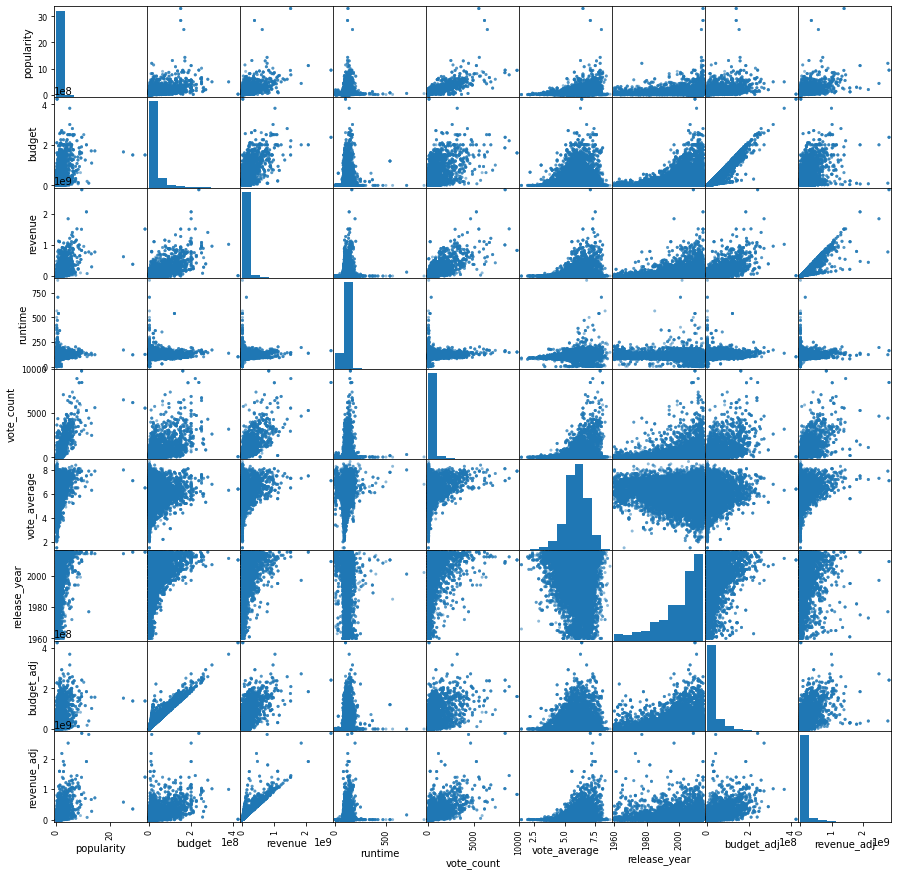

In [65]:
pd.plotting.scatter_matrix(df_main, figsize = (15,15));

<a id='conclusions'></a>
## Conclusions
>With regards to my analysis so far, we have been able to identify the features that determine how high the revenue and popularity of a movie can get. We have also been able to determine that the runtime of a movie and the genre has a lot to do with the revenue.

>Limitations: I am sure there are better ways to split the genre column.Also, other limitations to this analysis are;
    1. There were so many missing data that were dropped which might have altered the analysis result
    2. It is noticed that allot of records(11442 rows) have 0 value for budget and/or revenue. This is a big limitation as        it kind of give a hint of incomplete information.



In [67]:
df_main.query('budget == 0')

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_len
9,0.848748,0,0,Descendants,Kenny Ortega,fairy tale|villain|musical|teen movie|teenager,112,Music,Walt Disney Television,262,6.7,2015,0.0,0.0,mod_long
10,0.640151,0,0,Lava,James Ford Murphy,pixar animated short|animation|pixar|short,7,Animation,Pixar Animation Studios,298,7.3,2015,0.0,0.0,short
20,1.375493,0,0,Marvel One-Shot: All Hail the King,Drew Pearce,marvel comic|based on comic book|iron man|marv...,14,Comedy,Marvel Studios,72,7.1,2014,0.0,0.0,short
21,0.705700,0,0,Feast,Patrick Osborne,cake|pixar animated short|food|dog|organic food,6,Romance,Walt Disney Animation Studios,318,8.0,2014,0.0,0.0,short
22,0.472703,0,0,Vampire Academy,Mark Waters,authority|vampire|half vampire|danger of life|...,104,Action,Kintop Pictures|Angry Films|Preger Entertainment,402,5.8,2014,0.0,0.0,mod_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24710,0.102530,0,0,Funeral in Berlin,Guy Hamilton,berlin|berlin wall|england|spy|cold war,102,Thriller,Lowndes Productions Limited,13,5.7,1966,0.0,0.0,mod_long
24712,0.212716,0,0,Dracula: Prince of Darkness,Terence Fisher,castle|vampire|dracula|sequel|blood,90,Horror,Seven Arts Productions|Hammer Film Productions,16,5.7,1966,0.0,0.0,short
24713,0.227220,0,0,A Big Hand for the Little Lady,Fielder Cook,poker game,95,Western,Eden Productions Inc.,11,6.0,1966,0.0,0.0,medium
24714,0.087034,0,0,Carry On Screaming!,Gerald Thomas,monster|carry on|horror spoof,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966,0.0,0.0,short
